This notebook is for developing a function to call after executing a script, that picks up the saved stats and parameters and writes them in a csv file. 

In [1]:
import sys
sys.path.append('..')
import os

from utils.constants import *
from utils.file_readers import *
from utils.data_exploration import *
from utils.signal_processing import *
from utils.sliding_window import *
from utils.stand_norm import *
from utils.one_vs_all_training import *

Using TensorFlow backend.


In [2]:
experiment_name = '00_sit_to_stand_downsample_16_all_correctness_balance_30'
activity_name = 'Sit to stand'
correctness = 'all'

random_seed = 42

n_train_subjects = 12
n_validation_subjects = 2

n_time_steps = 38
step = 19
n_features = 3

features = ['accel_x_normalised', 'accel_y_normalised', 'accel_z_normalised']
features_name = 'normalised'

num_filters = 64
kernel_size = 3
activation = 'relu'

lr = 0.0001
batch_size = 32
epochs = 200

downsample_rate = 16
positive_class_weight = 30.

In [4]:
activity_names = get_activity_name_dict()
one_vs_all_activity = activity_names[activity_name]

In [5]:
if not os.path.exists("../Plots/{}".format(experiment_name)):
    os.mkdir("../Plots/{}".format(experiment_name))

Left out subject = adela
Test subjects = ['aggie', 'andrius', 'diana', 'jack', 'joao', 'nikita', 'rim', 'ron', 'santi', 'seb', 'sharan', 'teo']
Validation subjects = ['lukasz', 'zoe']
--------------------------------------------------------------------------------
Removing outliers
--------------------------------------------------------------------------------
Original dataframe length = 117502
New dataframe length = 115290
Removed 2212 outliers
Original dataframe length = 8965
New dataframe length = 8749
Removed 216 outliers
--------------------------------------------------------------------------------
Standardising
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Normalising
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Generating datasets
----------------

4952/4952 [==============================] - 4s 759us/step - loss: 0.9339 - accuracy: 0.7048 - mse: 0.2187 - val_loss: 0.7111 - val_accuracy: 0.6943 - val_mse: 0.2347
Epoch 32/200
4952/4952 [==============================] - 4s 760us/step - loss: 0.9337 - accuracy: 0.7025 - mse: 0.2164 - val_loss: 0.7152 - val_accuracy: 0.6900 - val_mse: 0.2360
Epoch 33/200
4952/4952 [==============================] - 4s 756us/step - loss: 0.9133 - accuracy: 0.7068 - mse: 0.2134 - val_loss: 0.6968 - val_accuracy: 0.7014 - val_mse: 0.2294
Epoch 34/200
4952/4952 [==============================] - 4s 745us/step - loss: 0.9045 - accuracy: 0.7124 - mse: 0.2116 - val_loss: 0.6719 - val_accuracy: 0.7129 - val_mse: 0.2216
Epoch 35/200
4952/4952 [==============================] - 4s 759us/step - loss: 0.8945 - accuracy: 0.7171 - mse: 0.2067 - val_loss: 0.6761 - val_accuracy: 0.7143 - val_mse: 0.2222
Epoch 36/200
4952/4952 [==============================] - 4s 735us/step - loss: 0.8809 - accuracy: 0.7203 - mse: 

4952/4952 [==============================] - 4s 711us/step - loss: 0.5617 - accuracy: 0.8354 - mse: 0.1161 - val_loss: 0.4454 - val_accuracy: 0.8000 - val_mse: 0.1414
Epoch 77/200
4952/4952 [==============================] - 4s 715us/step - loss: 0.5623 - accuracy: 0.8330 - mse: 0.1163 - val_loss: 0.4193 - val_accuracy: 0.8100 - val_mse: 0.1336
Epoch 78/200
4952/4952 [==============================] - 4s 709us/step - loss: 0.5562 - accuracy: 0.8350 - mse: 0.1143 - val_loss: 0.4290 - val_accuracy: 0.8071 - val_mse: 0.1360
Epoch 79/200
4952/4952 [==============================] - 4s 710us/step - loss: 0.5546 - accuracy: 0.8389 - mse: 0.1136 - val_loss: 0.4478 - val_accuracy: 0.8000 - val_mse: 0.1417
Epoch 80/200
4952/4952 [==============================] - 4s 710us/step - loss: 0.5444 - accuracy: 0.8419 - mse: 0.1100 - val_loss: 0.4365 - val_accuracy: 0.8057 - val_mse: 0.1383
Epoch 81/200
4952/4952 [==============================] - 4s 717us/step - loss: 0.5416 - accuracy: 0.8401 - mse: 

4952/4952 [==============================] - 4s 718us/step - loss: 0.3928 - accuracy: 0.8954 - mse: 0.0759 - val_loss: 0.3034 - val_accuracy: 0.8714 - val_mse: 0.0956
Epoch 122/200
4952/4952 [==============================] - 4s 710us/step - loss: 0.3924 - accuracy: 0.8956 - mse: 0.0740 - val_loss: 0.3246 - val_accuracy: 0.8614 - val_mse: 0.1019
Epoch 123/200
4952/4952 [==============================] - 4s 716us/step - loss: 0.3841 - accuracy: 0.9008 - mse: 0.0713 - val_loss: 0.3452 - val_accuracy: 0.8514 - val_mse: 0.1077
Epoch 124/200
4952/4952 [==============================] - 4s 711us/step - loss: 0.3851 - accuracy: 0.8946 - mse: 0.0740 - val_loss: 0.3035 - val_accuracy: 0.8700 - val_mse: 0.0956
Epoch 125/200
4952/4952 [==============================] - 4s 715us/step - loss: 0.3900 - accuracy: 0.8952 - mse: 0.0748 - val_loss: 0.3436 - val_accuracy: 0.8571 - val_mse: 0.1072
Epoch 126/200
4952/4952 [==============================] - 4s 707us/step - loss: 0.3812 - accuracy: 0.8974 - 

4952/4952 [==============================] - 4s 708us/step - loss: 0.3073 - accuracy: 0.9212 - mse: 0.0569 - val_loss: 0.3106 - val_accuracy: 0.8714 - val_mse: 0.0964
Epoch 167/200
4952/4952 [==============================] - 4s 733us/step - loss: 0.3077 - accuracy: 0.9225 - mse: 0.0565 - val_loss: 0.2494 - val_accuracy: 0.8886 - val_mse: 0.0789
Epoch 168/200
4952/4952 [==============================] - 4s 717us/step - loss: 0.3045 - accuracy: 0.9223 - mse: 0.0563 - val_loss: 0.2742 - val_accuracy: 0.8800 - val_mse: 0.0859
Epoch 169/200
4952/4952 [==============================] - 4s 714us/step - loss: 0.3083 - accuracy: 0.9221 - mse: 0.0551 - val_loss: 0.2788 - val_accuracy: 0.8757 - val_mse: 0.0874
Epoch 170/200
4952/4952 [==============================] - 4s 725us/step - loss: 0.3051 - accuracy: 0.9218 - mse: 0.0561 - val_loss: 0.3207 - val_accuracy: 0.8700 - val_mse: 0.0991
Epoch 171/200
4952/4952 [==============================] - 4s 714us/step - loss: 0.2970 - accuracy: 0.9239 - 

Train on 4755 samples, validate on 917 samples
Epoch 1/200
4755/4755 [==============================] - 6s 1ms/step - loss: 2.2312 - accuracy: 0.1737 - mse: 0.4708 - val_loss: 0.7579 - val_accuracy: 0.1341 - val_mse: 0.2823
Epoch 2/200
4755/4755 [==============================] - 4s 743us/step - loss: 1.9278 - accuracy: 0.1659 - mse: 0.5221 - val_loss: 0.7859 - val_accuracy: 0.1341 - val_mse: 0.2960
Epoch 3/200
4755/4755 [==============================] - 3s 734us/step - loss: 1.8478 - accuracy: 0.1672 - mse: 0.5096 - val_loss: 0.8764 - val_accuracy: 0.1363 - val_mse: 0.3391
Epoch 4/200
4755/4755 [==============================] - 3s 735us/step - loss: 1.7810 - accuracy: 0.1695 - mse: 0.4935 - val_loss: 1.0252 - val_accuracy: 0.1439 - val_mse: 0.4021
Epoch 5/200
4755/4755 [==============================] - 3s 732us/step - loss: 1.7244 - accuracy: 0.1773 - mse: 0.4741 - val_loss: 1.1632 - val_accuracy: 0.1516 - val_mse: 0.4498
Epoch 6/200
4755/4755 [==============================] - 3s 

4755/4755 [==============================] - 4s 754us/step - loss: 0.8284 - accuracy: 0.7575 - mse: 0.1736 - val_loss: 0.5949 - val_accuracy: 0.7252 - val_mse: 0.1892
Epoch 47/200
4755/4755 [==============================] - 4s 744us/step - loss: 0.8227 - accuracy: 0.7647 - mse: 0.1696 - val_loss: 0.5988 - val_accuracy: 0.7252 - val_mse: 0.1903
Epoch 48/200
4755/4755 [==============================] - 3s 726us/step - loss: 0.8089 - accuracy: 0.7695 - mse: 0.1665 - val_loss: 0.6159 - val_accuracy: 0.7186 - val_mse: 0.1955
Epoch 49/200
4755/4755 [==============================] - 4s 751us/step - loss: 0.8008 - accuracy: 0.7718 - mse: 0.1655 - val_loss: 0.5362 - val_accuracy: 0.7655 - val_mse: 0.1681
Epoch 50/200
4755/4755 [==============================] - 4s 739us/step - loss: 0.7822 - accuracy: 0.7746 - mse: 0.1627 - val_loss: 0.5397 - val_accuracy: 0.7666 - val_mse: 0.1691
Epoch 51/200
4755/4755 [==============================] - 4s 748us/step - loss: 0.7855 - accuracy: 0.7815 - mse: 

4755/4755 [==============================] - 4s 737us/step - loss: 0.5564 - accuracy: 0.8683 - mse: 0.1029 - val_loss: 0.4159 - val_accuracy: 0.8408 - val_mse: 0.1228
Epoch 92/200
4755/4755 [==============================] - 4s 736us/step - loss: 0.5455 - accuracy: 0.8650 - mse: 0.1037 - val_loss: 0.4286 - val_accuracy: 0.8386 - val_mse: 0.1268
Epoch 93/200
4755/4755 [==============================] - 4s 738us/step - loss: 0.5462 - accuracy: 0.8709 - mse: 0.1016 - val_loss: 0.4164 - val_accuracy: 0.8419 - val_mse: 0.1227
Epoch 94/200
4755/4755 [==============================] - 4s 737us/step - loss: 0.5434 - accuracy: 0.8698 - mse: 0.1015 - val_loss: 0.3859 - val_accuracy: 0.8517 - val_mse: 0.1132
Epoch 95/200
4755/4755 [==============================] - 3s 736us/step - loss: 0.5340 - accuracy: 0.8730 - mse: 0.0991 - val_loss: 0.4074 - val_accuracy: 0.8430 - val_mse: 0.1198
Epoch 96/200
4755/4755 [==============================] - 4s 763us/step - loss: 0.5312 - accuracy: 0.8709 - mse: 

4755/4755 [==============================] - 4s 739us/step - loss: 0.4150 - accuracy: 0.9014 - mse: 0.0758 - val_loss: 0.2898 - val_accuracy: 0.8986 - val_mse: 0.0810
Epoch 137/200
4755/4755 [==============================] - 3s 735us/step - loss: 0.4180 - accuracy: 0.8984 - mse: 0.0771 - val_loss: 0.3149 - val_accuracy: 0.8931 - val_mse: 0.0880
Epoch 138/200
4755/4755 [==============================] - 4s 741us/step - loss: 0.4103 - accuracy: 0.9022 - mse: 0.0751 - val_loss: 0.3199 - val_accuracy: 0.8877 - val_mse: 0.0891
Epoch 139/200
4755/4755 [==============================] - 3s 734us/step - loss: 0.4165 - accuracy: 0.8967 - mse: 0.0762 - val_loss: 0.3121 - val_accuracy: 0.8942 - val_mse: 0.0868
Epoch 140/200
4755/4755 [==============================] - 4s 745us/step - loss: 0.4086 - accuracy: 0.8995 - mse: 0.0756 - val_loss: 0.2858 - val_accuracy: 0.9019 - val_mse: 0.0795
Epoch 141/200
4755/4755 [==============================] - 4s 737us/step - loss: 0.4025 - accuracy: 0.9045 - 

4755/4755 [==============================] - 4s 745us/step - loss: 0.3389 - accuracy: 0.9195 - mse: 0.0609 - val_loss: 0.2629 - val_accuracy: 0.9128 - val_mse: 0.0710
Epoch 182/200
4755/4755 [==============================] - 4s 739us/step - loss: 0.3289 - accuracy: 0.9226 - mse: 0.0591 - val_loss: 0.2207 - val_accuracy: 0.9226 - val_mse: 0.0601
Epoch 183/200
4755/4755 [==============================] - 4s 753us/step - loss: 0.3356 - accuracy: 0.9207 - mse: 0.0602 - val_loss: 0.2327 - val_accuracy: 0.9193 - val_mse: 0.0630
Epoch 184/200
4755/4755 [==============================] - 4s 739us/step - loss: 0.3265 - accuracy: 0.9222 - mse: 0.0590 - val_loss: 0.2529 - val_accuracy: 0.9171 - val_mse: 0.0679
Epoch 185/200
4755/4755 [==============================] - 3s 728us/step - loss: 0.3294 - accuracy: 0.9230 - mse: 0.0589 - val_loss: 0.2720 - val_accuracy: 0.9138 - val_mse: 0.0728
Epoch 186/200
4755/4755 [==============================] - 4s 736us/step - loss: 0.3296 - accuracy: 0.9226 - 

4673/4673 [==============================] - 3s 746us/step - loss: 1.5767 - accuracy: 0.2007 - mse: 0.4297 - val_loss: 1.0622 - val_accuracy: 0.2383 - val_mse: 0.4013
Epoch 11/200
4673/4673 [==============================] - 4s 750us/step - loss: 1.5374 - accuracy: 0.2309 - mse: 0.4138 - val_loss: 1.0190 - val_accuracy: 0.2731 - val_mse: 0.3823
Epoch 12/200
4673/4673 [==============================] - 3s 740us/step - loss: 1.4984 - accuracy: 0.2619 - mse: 0.4025 - val_loss: 0.9880 - val_accuracy: 0.3188 - val_mse: 0.3677
Epoch 13/200
4673/4673 [==============================] - 3s 730us/step - loss: 1.4589 - accuracy: 0.2955 - mse: 0.3880 - val_loss: 0.9719 - val_accuracy: 0.3406 - val_mse: 0.3592
Epoch 14/200
4673/4673 [==============================] - 3s 739us/step - loss: 1.4263 - accuracy: 0.3263 - mse: 0.3772 - val_loss: 0.9407 - val_accuracy: 0.3808 - val_mse: 0.3443
Epoch 15/200
4673/4673 [==============================] - 3s 732us/step - loss: 1.3965 - accuracy: 0.3572 - mse: 

Epoch 56/200
4673/4673 [==============================] - 6s 1ms/step - loss: 0.7336 - accuracy: 0.8119 - mse: 0.1417 - val_loss: 0.4429 - val_accuracy: 0.8346 - val_mse: 0.1262
Epoch 57/200
4673/4673 [==============================] - 6s 1ms/step - loss: 0.7208 - accuracy: 0.8093 - mse: 0.1429 - val_loss: 0.3845 - val_accuracy: 0.8640 - val_mse: 0.1078
Epoch 58/200
4673/4673 [==============================] - 6s 1ms/step - loss: 0.7118 - accuracy: 0.8224 - mse: 0.1366 - val_loss: 0.3640 - val_accuracy: 0.8716 - val_mse: 0.1010
Epoch 59/200
4673/4673 [==============================] - 4s 919us/step - loss: 0.7104 - accuracy: 0.8256 - mse: 0.1344 - val_loss: 0.4014 - val_accuracy: 0.8564 - val_mse: 0.1126
Epoch 60/200
4673/4673 [==============================] - 4s 842us/step - loss: 0.7019 - accuracy: 0.8177 - mse: 0.1379 - val_loss: 0.4494 - val_accuracy: 0.8303 - val_mse: 0.1285
Epoch 61/200
4673/4673 [==============================] - 4s 810us/step - loss: 0.6993 - accuracy: 0.8230 

Epoch 102/200
4673/4673 [==============================] - 7s 2ms/step - loss: 0.5226 - accuracy: 0.8761 - mse: 0.0935 - val_loss: 0.4028 - val_accuracy: 0.8444 - val_mse: 0.1140
Epoch 103/200
4673/4673 [==============================] - 4s 914us/step - loss: 0.5140 - accuracy: 0.8814 - mse: 0.0930 - val_loss: 0.2809 - val_accuracy: 0.9053 - val_mse: 0.0766
Epoch 104/200
4673/4673 [==============================] - 4s 904us/step - loss: 0.5163 - accuracy: 0.8795 - mse: 0.0927 - val_loss: 0.2452 - val_accuracy: 0.9195 - val_mse: 0.0660
Epoch 105/200
4673/4673 [==============================] - 3s 747us/step - loss: 0.5128 - accuracy: 0.8791 - mse: 0.0941 - val_loss: 0.3081 - val_accuracy: 0.8912 - val_mse: 0.0851
Epoch 106/200
4673/4673 [==============================] - 4s 864us/step - loss: 0.5084 - accuracy: 0.8757 - mse: 0.0935 - val_loss: 0.2590 - val_accuracy: 0.9140 - val_mse: 0.0702
Epoch 107/200
4673/4673 [==============================] - 4s 857us/step - loss: 0.5069 - accurac

4673/4673 [==============================] - 4s 757us/step - loss: 0.4384 - accuracy: 0.8988 - mse: 0.0772 - val_loss: 0.1673 - val_accuracy: 0.9391 - val_mse: 0.0459
Epoch 148/200
4673/4673 [==============================] - 4s 777us/step - loss: 0.4293 - accuracy: 0.8951 - mse: 0.0792 - val_loss: 0.2204 - val_accuracy: 0.9238 - val_mse: 0.0612
Epoch 149/200
4673/4673 [==============================] - 4s 753us/step - loss: 0.4258 - accuracy: 0.9039 - mse: 0.0748 - val_loss: 0.5962 - val_accuracy: 0.7878 - val_mse: 0.1621
Epoch 150/200
4673/4673 [==============================] - 4s 785us/step - loss: 0.4858 - accuracy: 0.8598 - mse: 0.1059 - val_loss: 0.2568 - val_accuracy: 0.9108 - val_mse: 0.0688
Epoch 151/200
4673/4673 [==============================] - 4s 752us/step - loss: 0.4468 - accuracy: 0.8915 - mse: 0.0818 - val_loss: 0.1967 - val_accuracy: 0.9325 - val_mse: 0.0522
Epoch 152/200
4673/4673 [==============================] - 4s 766us/step - loss: 0.4452 - accuracy: 0.8939 - 

4673/4673 [==============================] - 4s 777us/step - loss: 0.3835 - accuracy: 0.9039 - mse: 0.0707 - val_loss: 0.2709 - val_accuracy: 0.8999 - val_mse: 0.0749
Epoch 193/200
4673/4673 [==============================] - 4s 766us/step - loss: 0.3735 - accuracy: 0.9076 - mse: 0.0685 - val_loss: 0.2694 - val_accuracy: 0.8977 - val_mse: 0.0749
Epoch 194/200
4673/4673 [==============================] - 4s 778us/step - loss: 0.3758 - accuracy: 0.9114 - mse: 0.0661 - val_loss: 0.1958 - val_accuracy: 0.9314 - val_mse: 0.0532
Epoch 195/200
4673/4673 [==============================] - 4s 750us/step - loss: 0.3644 - accuracy: 0.9088 - mse: 0.0689 - val_loss: 0.1951 - val_accuracy: 0.9304 - val_mse: 0.0533
Epoch 196/200
4673/4673 [==============================] - 3s 739us/step - loss: 0.3723 - accuracy: 0.9101 - mse: 0.0673 - val_loss: 0.1748 - val_accuracy: 0.9347 - val_mse: 0.0475
Epoch 197/200
4673/4673 [==============================] - 4s 760us/step - loss: 0.3623 - accuracy: 0.9116 - 

4812/4812 [==============================] - 5s 992us/step - loss: 1.0826 - accuracy: 0.6340 - mse: 0.2551 - val_loss: 0.8232 - val_accuracy: 0.5669 - val_mse: 0.2847
Epoch 22/200
4812/4812 [==============================] - 5s 1ms/step - loss: 1.0591 - accuracy: 0.6511 - mse: 0.2482 - val_loss: 0.7860 - val_accuracy: 0.5976 - val_mse: 0.2703
Epoch 23/200
4812/4812 [==============================] - 5s 972us/step - loss: 1.0353 - accuracy: 0.6598 - mse: 0.2411 - val_loss: 0.7454 - val_accuracy: 0.6331 - val_mse: 0.2540
Epoch 24/200
4812/4812 [==============================] - 4s 775us/step - loss: 1.0130 - accuracy: 0.6808 - mse: 0.2298 - val_loss: 0.7748 - val_accuracy: 0.6249 - val_mse: 0.2633
Epoch 25/200
4812/4812 [==============================] - 4s 788us/step - loss: 0.9941 - accuracy: 0.6829 - mse: 0.2277 - val_loss: 0.7315 - val_accuracy: 0.6485 - val_mse: 0.2472
Epoch 26/200
4812/4812 [==============================] - 4s 771us/step - loss: 0.9767 - accuracy: 0.6978 - mse: 0.

4812/4812 [==============================] - 4s 789us/step - loss: 0.5764 - accuracy: 0.8601 - mse: 0.1082 - val_loss: 0.3940 - val_accuracy: 0.8379 - val_mse: 0.1172
Epoch 67/200
4812/4812 [==============================] - 4s 790us/step - loss: 0.5695 - accuracy: 0.8624 - mse: 0.1070 - val_loss: 0.4088 - val_accuracy: 0.8308 - val_mse: 0.1221
Epoch 68/200
4812/4812 [==============================] - 4s 875us/step - loss: 0.5681 - accuracy: 0.8614 - mse: 0.1065 - val_loss: 0.4170 - val_accuracy: 0.8260 - val_mse: 0.1252
Epoch 69/200
4812/4812 [==============================] - 4s 747us/step - loss: 0.5679 - accuracy: 0.8622 - mse: 0.1054 - val_loss: 0.4433 - val_accuracy: 0.8118 - val_mse: 0.1340
Epoch 70/200
4812/4812 [==============================] - 4s 764us/step - loss: 0.5603 - accuracy: 0.8628 - mse: 0.1053 - val_loss: 0.4492 - val_accuracy: 0.8130 - val_mse: 0.1360
Epoch 71/200
4812/4812 [==============================] - 4s 778us/step - loss: 0.5582 - accuracy: 0.8655 - mse: 

4812/4812 [==============================] - 5s 1ms/step - loss: 0.4124 - accuracy: 0.9009 - mse: 0.0761 - val_loss: 0.3003 - val_accuracy: 0.8805 - val_mse: 0.0873
Epoch 112/200
4812/4812 [==============================] - 5s 1ms/step - loss: 0.4198 - accuracy: 0.8978 - mse: 0.0762 - val_loss: 0.3534 - val_accuracy: 0.8462 - val_mse: 0.1052
Epoch 113/200
4812/4812 [==============================] - 5s 974us/step - loss: 0.4031 - accuracy: 0.9015 - mse: 0.0749 - val_loss: 0.2910 - val_accuracy: 0.8852 - val_mse: 0.0845
Epoch 114/200
4812/4812 [==============================] - 4s 835us/step - loss: 0.4034 - accuracy: 0.9054 - mse: 0.0727 - val_loss: 0.3340 - val_accuracy: 0.8615 - val_mse: 0.0983
Epoch 115/200
4812/4812 [==============================] - 4s 888us/step - loss: 0.3996 - accuracy: 0.9030 - mse: 0.0735 - val_loss: 0.3099 - val_accuracy: 0.8734 - val_mse: 0.0910
Epoch 116/200
4812/4812 [==============================] - 4s 839us/step - loss: 0.4051 - accuracy: 0.8992 - mse:

4812/4812 [==============================] - 5s 1ms/step - loss: 0.3209 - accuracy: 0.9208 - mse: 0.0592 - val_loss: 0.2161 - val_accuracy: 0.9183 - val_mse: 0.0618
Epoch 157/200
4812/4812 [==============================] - 4s 824us/step - loss: 0.3195 - accuracy: 0.9250 - mse: 0.0574 - val_loss: 0.2484 - val_accuracy: 0.9041 - val_mse: 0.0721
Epoch 158/200
4812/4812 [==============================] - 4s 752us/step - loss: 0.3204 - accuracy: 0.9248 - mse: 0.0572 - val_loss: 0.2645 - val_accuracy: 0.8947 - val_mse: 0.0771
Epoch 159/200
4812/4812 [==============================] - 4s 778us/step - loss: 0.3205 - accuracy: 0.9246 - mse: 0.0585 - val_loss: 0.2799 - val_accuracy: 0.8888 - val_mse: 0.0826
Epoch 160/200
4812/4812 [==============================] - 4s 779us/step - loss: 0.3179 - accuracy: 0.9237 - mse: 0.0578 - val_loss: 0.2486 - val_accuracy: 0.9018 - val_mse: 0.0721
Epoch 161/200
4812/4812 [==============================] - 4s 759us/step - loss: 0.3136 - accuracy: 0.9252 - ms

--------------------------------------------------------------------------------
Removing outliers
--------------------------------------------------------------------------------
Original dataframe length = 116952
New dataframe length = 114654
Removed 2298 outliers
Original dataframe length = 9515
New dataframe length = 9336
Removed 179 outliers
--------------------------------------------------------------------------------
Standardising
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Normalising
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Generating datasets
--------------------------------------------------------------------------------
Total samples for true activity = 4919
Total samples for false activity = 0
Training set shapes: X_train = (4919, 38, 3

4919/4919 [==============================] - 4s 796us/step - loss: 0.9084 - accuracy: 0.7140 - mse: 0.2015 - val_loss: 0.6904 - val_accuracy: 0.6973 - val_mse: 0.2170
Epoch 33/200
4919/4919 [==============================] - 4s 716us/step - loss: 0.8965 - accuracy: 0.7274 - mse: 0.1958 - val_loss: 0.7385 - val_accuracy: 0.6729 - val_mse: 0.2311
Epoch 34/200
4919/4919 [==============================] - 4s 729us/step - loss: 0.8768 - accuracy: 0.7239 - mse: 0.1948 - val_loss: 0.7100 - val_accuracy: 0.6872 - val_mse: 0.2215
Epoch 35/200
4919/4919 [==============================] - 4s 757us/step - loss: 0.8618 - accuracy: 0.7339 - mse: 0.1889 - val_loss: 0.6802 - val_accuracy: 0.7001 - val_mse: 0.2111
Epoch 36/200
4919/4919 [==============================] - 4s 804us/step - loss: 0.8482 - accuracy: 0.7367 - mse: 0.1860 - val_loss: 0.6705 - val_accuracy: 0.7044 - val_mse: 0.2072
Epoch 37/200
4919/4919 [==============================] - 4s 764us/step - loss: 0.8372 - accuracy: 0.7453 - mse: 

4919/4919 [==============================] - 4s 762us/step - loss: 0.5559 - accuracy: 0.8654 - mse: 0.1017 - val_loss: 0.5222 - val_accuracy: 0.8020 - val_mse: 0.1449
Epoch 78/200
4919/4919 [==============================] - 4s 813us/step - loss: 0.5435 - accuracy: 0.8599 - mse: 0.1040 - val_loss: 0.4452 - val_accuracy: 0.8422 - val_mse: 0.1229
Epoch 79/200
4919/4919 [==============================] - 4s 793us/step - loss: 0.5367 - accuracy: 0.8632 - mse: 0.1018 - val_loss: 0.4926 - val_accuracy: 0.8164 - val_mse: 0.1362
Epoch 80/200
4919/4919 [==============================] - 4s 755us/step - loss: 0.5438 - accuracy: 0.8705 - mse: 0.0993 - val_loss: 0.4765 - val_accuracy: 0.8235 - val_mse: 0.1314
Epoch 81/200
4919/4919 [==============================] - 4s 788us/step - loss: 0.5351 - accuracy: 0.8664 - mse: 0.1002 - val_loss: 0.4336 - val_accuracy: 0.8451 - val_mse: 0.1195
Epoch 82/200
4919/4919 [==============================] - 4s 875us/step - loss: 0.5309 - accuracy: 0.8683 - mse: 

4919/4919 [==============================] - 4s 743us/step - loss: 0.4289 - accuracy: 0.9020 - mse: 0.0756 - val_loss: 0.3821 - val_accuracy: 0.8680 - val_mse: 0.1033
Epoch 123/200
4919/4919 [==============================] - 4s 715us/step - loss: 0.4244 - accuracy: 0.8977 - mse: 0.0768 - val_loss: 0.3907 - val_accuracy: 0.8666 - val_mse: 0.1058
Epoch 124/200
4919/4919 [==============================] - 4s 726us/step - loss: 0.4102 - accuracy: 0.9032 - mse: 0.0742 - val_loss: 0.3977 - val_accuracy: 0.8623 - val_mse: 0.1076
Epoch 125/200
4919/4919 [==============================] - 4s 729us/step - loss: 0.4199 - accuracy: 0.9038 - mse: 0.0738 - val_loss: 0.4156 - val_accuracy: 0.8565 - val_mse: 0.1121
Epoch 126/200
4919/4919 [==============================] - 3s 710us/step - loss: 0.4132 - accuracy: 0.9002 - mse: 0.0755 - val_loss: 0.4280 - val_accuracy: 0.8522 - val_mse: 0.1155
Epoch 127/200
4919/4919 [==============================] - 3s 709us/step - loss: 0.4094 - accuracy: 0.9053 - 

4919/4919 [==============================] - 4s 739us/step - loss: 0.3447 - accuracy: 0.9217 - mse: 0.0627 - val_loss: 0.3686 - val_accuracy: 0.8780 - val_mse: 0.1002
Epoch 168/200
4919/4919 [==============================] - 4s 761us/step - loss: 0.3394 - accuracy: 0.9207 - mse: 0.0603 - val_loss: 0.3653 - val_accuracy: 0.8795 - val_mse: 0.0994
Epoch 169/200
4919/4919 [==============================] - 4s 808us/step - loss: 0.3472 - accuracy: 0.9221 - mse: 0.0606 - val_loss: 0.3565 - val_accuracy: 0.8809 - val_mse: 0.0971
Epoch 170/200
4919/4919 [==============================] - 4s 762us/step - loss: 0.3375 - accuracy: 0.9187 - mse: 0.0612 - val_loss: 0.3566 - val_accuracy: 0.8809 - val_mse: 0.0974
Epoch 171/200
4919/4919 [==============================] - 4s 789us/step - loss: 0.3336 - accuracy: 0.9246 - mse: 0.0586 - val_loss: 0.3733 - val_accuracy: 0.8795 - val_mse: 0.1013
Epoch 172/200
4919/4919 [==============================] - 4s 771us/step - loss: 0.3419 - accuracy: 0.9236 - 

Train on 4805 samples, validate on 1018 samples
Epoch 1/200
4805/4805 [==============================] - 6s 1ms/step - loss: 2.2996 - accuracy: 0.2094 - mse: 0.4327 - val_loss: 0.7771 - val_accuracy: 0.1415 - val_mse: 0.2918
Epoch 2/200
4805/4805 [==============================] - 4s 803us/step - loss: 1.9217 - accuracy: 0.1702 - mse: 0.5002 - val_loss: 0.7942 - val_accuracy: 0.1582 - val_mse: 0.3001
Epoch 3/200
4805/4805 [==============================] - 4s 838us/step - loss: 1.8167 - accuracy: 0.1771 - mse: 0.4880 - val_loss: 0.8702 - val_accuracy: 0.1758 - val_mse: 0.3354
Epoch 4/200
4805/4805 [==============================] - 4s 887us/step - loss: 1.7300 - accuracy: 0.1904 - mse: 0.4684 - val_loss: 0.9943 - val_accuracy: 0.2033 - val_mse: 0.3852
Epoch 5/200
4805/4805 [==============================] - 4s 892us/step - loss: 1.6638 - accuracy: 0.2144 - mse: 0.4426 - val_loss: 1.1085 - val_accuracy: 0.2358 - val_mse: 0.4201
Epoch 6/200
4805/4805 [==============================] - 4s

4805/4805 [==============================] - 10s 2ms/step - loss: 0.7566 - accuracy: 0.7821 - mse: 0.1573 - val_loss: 0.4582 - val_accuracy: 0.7937 - val_mse: 0.1443
Epoch 47/200
4805/4805 [==============================] - 6s 1ms/step - loss: 0.7507 - accuracy: 0.7846 - mse: 0.1561 - val_loss: 0.5021 - val_accuracy: 0.7711 - val_mse: 0.1588
Epoch 48/200
4805/4805 [==============================] - 4s 806us/step - loss: 0.7317 - accuracy: 0.7900 - mse: 0.1523 - val_loss: 0.4665 - val_accuracy: 0.7917 - val_mse: 0.1469
Epoch 49/200
4805/4805 [==============================] - 4s 860us/step - loss: 0.7273 - accuracy: 0.7919 - mse: 0.1505 - val_loss: 0.4810 - val_accuracy: 0.7809 - val_mse: 0.1514
Epoch 50/200
4805/4805 [==============================] - 4s 889us/step - loss: 0.7182 - accuracy: 0.7981 - mse: 0.1478 - val_loss: 0.4586 - val_accuracy: 0.7967 - val_mse: 0.1440
Epoch 51/200
4805/4805 [==============================] - 4s 855us/step - loss: 0.7040 - accuracy: 0.7992 - mse: 0.1

Epoch 92/200
4805/4805 [==============================] - 4s 766us/step - loss: 0.4920 - accuracy: 0.8787 - mse: 0.0929 - val_loss: 0.3350 - val_accuracy: 0.8684 - val_mse: 0.0995
Epoch 93/200
4805/4805 [==============================] - 5s 1ms/step - loss: 0.4973 - accuracy: 0.8826 - mse: 0.0924 - val_loss: 0.3415 - val_accuracy: 0.8635 - val_mse: 0.1016
Epoch 94/200
4805/4805 [==============================] - 4s 925us/step - loss: 0.4840 - accuracy: 0.8837 - mse: 0.0895 - val_loss: 0.3554 - val_accuracy: 0.8615 - val_mse: 0.1050
Epoch 95/200
4805/4805 [==============================] - 4s 911us/step - loss: 0.4864 - accuracy: 0.8776 - mse: 0.0929 - val_loss: 0.3028 - val_accuracy: 0.8802 - val_mse: 0.0900
Epoch 96/200
4805/4805 [==============================] - 4s 878us/step - loss: 0.4856 - accuracy: 0.8853 - mse: 0.0893 - val_loss: 0.3012 - val_accuracy: 0.8821 - val_mse: 0.0894
Epoch 97/200
4805/4805 [==============================] - 5s 1ms/step - loss: 0.4792 - accuracy: 0.884

4805/4805 [==============================] - 4s 873us/step - loss: 0.3902 - accuracy: 0.9028 - mse: 0.0738 - val_loss: 0.2927 - val_accuracy: 0.8919 - val_mse: 0.0839
Epoch 138/200
4805/4805 [==============================] - 4s 810us/step - loss: 0.3824 - accuracy: 0.9078 - mse: 0.0709 - val_loss: 0.2280 - val_accuracy: 0.9116 - val_mse: 0.0655
Epoch 139/200
4805/4805 [==============================] - 4s 854us/step - loss: 0.3879 - accuracy: 0.9055 - mse: 0.0708 - val_loss: 0.2003 - val_accuracy: 0.9244 - val_mse: 0.0573
Epoch 140/200
4805/4805 [==============================] - 4s 853us/step - loss: 0.3927 - accuracy: 0.9068 - mse: 0.0716 - val_loss: 0.2288 - val_accuracy: 0.9136 - val_mse: 0.0651
Epoch 141/200
4805/4805 [==============================] - 5s 957us/step - loss: 0.3859 - accuracy: 0.9109 - mse: 0.0696 - val_loss: 0.2594 - val_accuracy: 0.9028 - val_mse: 0.0741
Epoch 142/200
4805/4805 [==============================] - 5s 1ms/step - loss: 0.3862 - accuracy: 0.9082 - ms

4805/4805 [==============================] - 4s 763us/step - loss: 0.3158 - accuracy: 0.9263 - mse: 0.0573 - val_loss: 0.2102 - val_accuracy: 0.9194 - val_mse: 0.0585
Epoch 183/200
4805/4805 [==============================] - 4s 757us/step - loss: 0.3195 - accuracy: 0.9274 - mse: 0.0579 - val_loss: 0.2145 - val_accuracy: 0.9194 - val_mse: 0.0597
Epoch 184/200
4805/4805 [==============================] - 4s 896us/step - loss: 0.3171 - accuracy: 0.9263 - mse: 0.0578 - val_loss: 0.1970 - val_accuracy: 0.9263 - val_mse: 0.0551
Epoch 185/200
4805/4805 [==============================] - 4s 801us/step - loss: 0.3098 - accuracy: 0.9286 - mse: 0.0563 - val_loss: 0.2061 - val_accuracy: 0.9244 - val_mse: 0.0576
Epoch 186/200
4805/4805 [==============================] - 5s 1ms/step - loss: 0.3100 - accuracy: 0.9270 - mse: 0.0566 - val_loss: 0.2200 - val_accuracy: 0.9204 - val_mse: 0.0613
Epoch 187/200
4805/4805 [==============================] - 4s 829us/step - loss: 0.3138 - accuracy: 0.9284 - ms

4948/4948 [==============================] - 4s 858us/step - loss: 1.4913 - accuracy: 0.2684 - mse: 0.4049 - val_loss: 1.0714 - val_accuracy: 0.3033 - val_mse: 0.3942
Epoch 12/200
4948/4948 [==============================] - 4s 899us/step - loss: 1.4580 - accuracy: 0.3135 - mse: 0.3884 - val_loss: 1.0608 - val_accuracy: 0.3242 - val_mse: 0.3876
Epoch 13/200
4948/4948 [==============================] - 4s 855us/step - loss: 1.4284 - accuracy: 0.3470 - mse: 0.3793 - val_loss: 1.0294 - val_accuracy: 0.3490 - val_mse: 0.3738
Epoch 14/200
4948/4948 [==============================] - 4s 880us/step - loss: 1.3953 - accuracy: 0.3711 - mse: 0.3708 - val_loss: 1.0174 - val_accuracy: 0.3869 - val_mse: 0.3665
Epoch 15/200
4948/4948 [==============================] - 4s 830us/step - loss: 1.3678 - accuracy: 0.4113 - mse: 0.3558 - val_loss: 0.9900 - val_accuracy: 0.4327 - val_mse: 0.3544
Epoch 16/200
4948/4948 [==============================] - 4s 830us/step - loss: 1.3431 - accuracy: 0.4382 - mse: 

4948/4948 [==============================] - 4s 775us/step - loss: 0.6965 - accuracy: 0.8131 - mse: 0.1398 - val_loss: 0.5435 - val_accuracy: 0.7908 - val_mse: 0.1601
Epoch 57/200
4948/4948 [==============================] - 4s 791us/step - loss: 0.7051 - accuracy: 0.8165 - mse: 0.1384 - val_loss: 0.4996 - val_accuracy: 0.8157 - val_mse: 0.1462
Epoch 58/200
4948/4948 [==============================] - 4s 734us/step - loss: 0.6905 - accuracy: 0.8199 - mse: 0.1366 - val_loss: 0.5041 - val_accuracy: 0.8131 - val_mse: 0.1474
Epoch 59/200
4948/4948 [==============================] - 4s 807us/step - loss: 0.6891 - accuracy: 0.8226 - mse: 0.1337 - val_loss: 0.6060 - val_accuracy: 0.7686 - val_mse: 0.1783
Epoch 60/200
4948/4948 [==============================] - 4s 839us/step - loss: 0.6627 - accuracy: 0.8266 - mse: 0.1321 - val_loss: 0.5108 - val_accuracy: 0.8092 - val_mse: 0.1491
Epoch 61/200
4948/4948 [==============================] - 4s 827us/step - loss: 0.6717 - accuracy: 0.8288 - mse: 

4948/4948 [==============================] - 4s 727us/step - loss: 0.5025 - accuracy: 0.8795 - mse: 0.0922 - val_loss: 0.4117 - val_accuracy: 0.8523 - val_mse: 0.1166
Epoch 102/200
4948/4948 [==============================] - 4s 742us/step - loss: 0.4894 - accuracy: 0.8844 - mse: 0.0892 - val_loss: 0.4092 - val_accuracy: 0.8549 - val_mse: 0.1158
Epoch 103/200
4948/4948 [==============================] - 4s 726us/step - loss: 0.4938 - accuracy: 0.8804 - mse: 0.0910 - val_loss: 0.3656 - val_accuracy: 0.8719 - val_mse: 0.1042
Epoch 104/200
4948/4948 [==============================] - 4s 739us/step - loss: 0.4838 - accuracy: 0.8854 - mse: 0.0882 - val_loss: 0.4007 - val_accuracy: 0.8575 - val_mse: 0.1134
Epoch 105/200
4948/4948 [==============================] - 4s 739us/step - loss: 0.4877 - accuracy: 0.8836 - mse: 0.0883 - val_loss: 0.3821 - val_accuracy: 0.8641 - val_mse: 0.1084
Epoch 106/200
4948/4948 [==============================] - 4s 734us/step - loss: 0.4731 - accuracy: 0.8872 - 

4948/4948 [==============================] - 4s 734us/step - loss: 0.4189 - accuracy: 0.9044 - mse: 0.0737 - val_loss: 0.3165 - val_accuracy: 0.8915 - val_mse: 0.0906
Epoch 147/200
4948/4948 [==============================] - 4s 743us/step - loss: 0.3930 - accuracy: 0.9072 - mse: 0.0698 - val_loss: 0.3505 - val_accuracy: 0.8706 - val_mse: 0.0992
Epoch 148/200
4948/4948 [==============================] - 4s 731us/step - loss: 0.3963 - accuracy: 0.9093 - mse: 0.0711 - val_loss: 0.3253 - val_accuracy: 0.8837 - val_mse: 0.0926
Epoch 149/200
4948/4948 [==============================] - 4s 748us/step - loss: 0.3924 - accuracy: 0.9091 - mse: 0.0703 - val_loss: 0.3526 - val_accuracy: 0.8706 - val_mse: 0.0997
Epoch 150/200
4948/4948 [==============================] - 4s 737us/step - loss: 0.3925 - accuracy: 0.9105 - mse: 0.0698 - val_loss: 0.3521 - val_accuracy: 0.8693 - val_mse: 0.0993
Epoch 151/200
4948/4948 [==============================] - 4s 756us/step - loss: 0.3999 - accuracy: 0.9034 - 

4948/4948 [==============================] - 4s 732us/step - loss: 0.3333 - accuracy: 0.9192 - mse: 0.0603 - val_loss: 0.3007 - val_accuracy: 0.8876 - val_mse: 0.0861
Epoch 192/200
4948/4948 [==============================] - 4s 730us/step - loss: 0.3270 - accuracy: 0.9230 - mse: 0.0597 - val_loss: 0.3216 - val_accuracy: 0.8837 - val_mse: 0.0912
Epoch 193/200
4948/4948 [==============================] - 4s 727us/step - loss: 0.3370 - accuracy: 0.9214 - mse: 0.0600 - val_loss: 0.3954 - val_accuracy: 0.8536 - val_mse: 0.1116
Epoch 194/200
4948/4948 [==============================] - 4s 730us/step - loss: 0.3369 - accuracy: 0.9198 - mse: 0.0605 - val_loss: 0.2954 - val_accuracy: 0.8902 - val_mse: 0.0842
Epoch 195/200
4948/4948 [==============================] - 4s 729us/step - loss: 0.3344 - accuracy: 0.9194 - mse: 0.0596 - val_loss: 0.3643 - val_accuracy: 0.8667 - val_mse: 0.1030
Epoch 196/200
4948/4948 [==============================] - 4s 723us/step - loss: 0.3369 - accuracy: 0.9220 - 

5086/5086 [==============================] - 5s 913us/step - loss: 1.0284 - accuracy: 0.6270 - mse: 0.2458 - val_loss: 0.6723 - val_accuracy: 0.6656 - val_mse: 0.2232
Epoch 21/200
5086/5086 [==============================] - 4s 839us/step - loss: 1.0169 - accuracy: 0.6412 - mse: 0.2370 - val_loss: 0.6801 - val_accuracy: 0.6610 - val_mse: 0.2254
Epoch 22/200
5086/5086 [==============================] - 4s 788us/step - loss: 1.0033 - accuracy: 0.6459 - mse: 0.2342 - val_loss: 0.6677 - val_accuracy: 0.6702 - val_mse: 0.2196
Epoch 23/200
5086/5086 [==============================] - 4s 751us/step - loss: 0.9926 - accuracy: 0.6616 - mse: 0.2272 - val_loss: 0.6743 - val_accuracy: 0.6641 - val_mse: 0.2213
Epoch 24/200
5086/5086 [==============================] - 4s 748us/step - loss: 0.9733 - accuracy: 0.6681 - mse: 0.2241 - val_loss: 0.6401 - val_accuracy: 0.7009 - val_mse: 0.2073
Epoch 25/200
5086/5086 [==============================] - 4s 734us/step - loss: 0.9527 - accuracy: 0.6829 - mse: 

5086/5086 [==============================] - 4s 723us/step - loss: 0.5641 - accuracy: 0.8622 - mse: 0.1066 - val_loss: 0.3441 - val_accuracy: 0.8911 - val_mse: 0.0946
Epoch 66/200
5086/5086 [==============================] - 4s 721us/step - loss: 0.5622 - accuracy: 0.8618 - mse: 0.1039 - val_loss: 0.3691 - val_accuracy: 0.8834 - val_mse: 0.1022
Epoch 67/200
5086/5086 [==============================] - 4s 753us/step - loss: 0.5522 - accuracy: 0.8689 - mse: 0.1031 - val_loss: 0.3806 - val_accuracy: 0.8742 - val_mse: 0.1060
Epoch 68/200
5086/5086 [==============================] - 4s 726us/step - loss: 0.5386 - accuracy: 0.8716 - mse: 0.1012 - val_loss: 0.3608 - val_accuracy: 0.8850 - val_mse: 0.0997
Epoch 69/200
5086/5086 [==============================] - 4s 728us/step - loss: 0.5491 - accuracy: 0.8679 - mse: 0.1029 - val_loss: 0.3664 - val_accuracy: 0.8819 - val_mse: 0.1012
Epoch 70/200
5086/5086 [==============================] - 4s 732us/step - loss: 0.5391 - accuracy: 0.8710 - mse: 

5086/5086 [==============================] - 4s 731us/step - loss: 0.4033 - accuracy: 0.9117 - mse: 0.0707 - val_loss: 0.2587 - val_accuracy: 0.9233 - val_mse: 0.0684
Epoch 111/200
5086/5086 [==============================] - 4s 724us/step - loss: 0.3953 - accuracy: 0.9135 - mse: 0.0688 - val_loss: 0.3237 - val_accuracy: 0.8926 - val_mse: 0.0874
Epoch 112/200
5086/5086 [==============================] - 4s 741us/step - loss: 0.3970 - accuracy: 0.9133 - mse: 0.0704 - val_loss: 0.2586 - val_accuracy: 0.9248 - val_mse: 0.0681
Epoch 113/200
5086/5086 [==============================] - 4s 724us/step - loss: 0.4010 - accuracy: 0.9125 - mse: 0.0683 - val_loss: 0.2782 - val_accuracy: 0.9141 - val_mse: 0.0736
Epoch 114/200
5086/5086 [==============================] - 4s 717us/step - loss: 0.3976 - accuracy: 0.9109 - mse: 0.0707 - val_loss: 0.2332 - val_accuracy: 0.9248 - val_mse: 0.0613
Epoch 115/200
5086/5086 [==============================] - 4s 723us/step - loss: 0.3985 - accuracy: 0.9129 - 

5086/5086 [==============================] - 4s 701us/step - loss: 0.3117 - accuracy: 0.9314 - mse: 0.0546 - val_loss: 0.1968 - val_accuracy: 0.9387 - val_mse: 0.0503
Epoch 156/200
5086/5086 [==============================] - 4s 708us/step - loss: 0.3164 - accuracy: 0.9288 - mse: 0.0554 - val_loss: 0.2079 - val_accuracy: 0.9325 - val_mse: 0.0533
Epoch 157/200
5086/5086 [==============================] - 4s 741us/step - loss: 0.3166 - accuracy: 0.9312 - mse: 0.0555 - val_loss: 0.2318 - val_accuracy: 0.9279 - val_mse: 0.0599
Epoch 158/200
5086/5086 [==============================] - 5s 999us/step - loss: 0.3097 - accuracy: 0.9296 - mse: 0.0543 - val_loss: 0.2039 - val_accuracy: 0.9340 - val_mse: 0.0521
Epoch 159/200
5086/5086 [==============================] - 4s 872us/step - loss: 0.3258 - accuracy: 0.9288 - mse: 0.0563 - val_loss: 0.2024 - val_accuracy: 0.9371 - val_mse: 0.0514
Epoch 160/200
5086/5086 [==============================] - 4s 761us/step - loss: 0.3183 - accuracy: 0.9333 - 

344/344 [==============================] - 0s 578us/step
Final loss = 0.3130594666527454
Final accuracy = 0.9011628031730652
Left out subject = rim
Test subjects = ['adela', 'aggie', 'andrius', 'jack', 'joao', 'lukasz', 'nikita', 'ron', 'seb', 'sharan', 'teo', 'zoe']
Validation subjects = ['santi', 'diana']
--------------------------------------------------------------------------------
Removing outliers
--------------------------------------------------------------------------------
Original dataframe length = 115682
New dataframe length = 113693
Removed 1989 outliers
Original dataframe length = 10785
New dataframe length = 10414
Removed 371 outliers
--------------------------------------------------------------------------------
Standardising
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Normalising
-----------------------------------------------------------------------

4872/4872 [==============================] - 7s 1ms/step - loss: 0.8864 - accuracy: 0.7309 - mse: 0.1917 - val_loss: 0.6356 - val_accuracy: 0.7308 - val_mse: 0.1963
Epoch 30/200
4872/4872 [==============================] - 4s 820us/step - loss: 0.8640 - accuracy: 0.7422 - mse: 0.1841 - val_loss: 0.6329 - val_accuracy: 0.7308 - val_mse: 0.1949
Epoch 31/200
4872/4872 [==============================] - 5s 965us/step - loss: 0.8591 - accuracy: 0.7414 - mse: 0.1848 - val_loss: 0.6264 - val_accuracy: 0.7366 - val_mse: 0.1924
Epoch 32/200
4872/4872 [==============================] - 4s 883us/step - loss: 0.8472 - accuracy: 0.7529 - mse: 0.1771 - val_loss: 0.6320 - val_accuracy: 0.7323 - val_mse: 0.1929
Epoch 33/200
4872/4872 [==============================] - 7s 1ms/step - loss: 0.8267 - accuracy: 0.7545 - mse: 0.1780 - val_loss: 0.5875 - val_accuracy: 0.7482 - val_mse: 0.1785
Epoch 34/200
4872/4872 [==============================] - 8s 2ms/step - loss: 0.8145 - accuracy: 0.7654 - mse: 0.1700

Epoch 75/200
4872/4872 [==============================] - 7s 1ms/step - loss: 0.5215 - accuracy: 0.8715 - mse: 0.0971 - val_loss: 0.4023 - val_accuracy: 0.8480 - val_mse: 0.1146
Epoch 76/200
4872/4872 [==============================] - 7s 1ms/step - loss: 0.5250 - accuracy: 0.8715 - mse: 0.0971 - val_loss: 0.4044 - val_accuracy: 0.8480 - val_mse: 0.1154
Epoch 77/200
4872/4872 [==============================] - 10s 2ms/step - loss: 0.5147 - accuracy: 0.8717 - mse: 0.0977 - val_loss: 0.3677 - val_accuracy: 0.8669 - val_mse: 0.1040
Epoch 78/200
4872/4872 [==============================] - 10s 2ms/step - loss: 0.5085 - accuracy: 0.8760 - mse: 0.0926 - val_loss: 0.4365 - val_accuracy: 0.8365 - val_mse: 0.1250
Epoch 79/200
4872/4872 [==============================] - 4s 801us/step - loss: 0.5103 - accuracy: 0.8703 - mse: 0.0964 - val_loss: 0.3588 - val_accuracy: 0.8698 - val_mse: 0.1018
Epoch 80/200
4872/4872 [==============================] - 4s 803us/step - loss: 0.5038 - accuracy: 0.8797 

Epoch 121/200
4872/4872 [==============================] - 8s 2ms/step - loss: 0.3945 - accuracy: 0.9080 - mse: 0.0696 - val_loss: 0.3372 - val_accuracy: 0.8755 - val_mse: 0.0961
Epoch 122/200
4872/4872 [==============================] - 8s 2ms/step - loss: 0.3996 - accuracy: 0.9044 - mse: 0.0726 - val_loss: 0.2385 - val_accuracy: 0.9190 - val_mse: 0.0676
Epoch 123/200
4872/4872 [==============================] - 8s 2ms/step - loss: 0.3855 - accuracy: 0.9095 - mse: 0.0688 - val_loss: 0.3101 - val_accuracy: 0.8900 - val_mse: 0.0881
Epoch 124/200
4872/4872 [==============================] - 7s 1ms/step - loss: 0.3855 - accuracy: 0.9080 - mse: 0.0690 - val_loss: 0.2651 - val_accuracy: 0.9103 - val_mse: 0.0751
Epoch 125/200
4872/4872 [==============================] - 7s 2ms/step - loss: 0.3820 - accuracy: 0.9107 - mse: 0.0667 - val_loss: 0.2647 - val_accuracy: 0.9103 - val_mse: 0.0752
Epoch 126/200
4872/4872 [==============================] - 13s 3ms/step - loss: 0.3751 - accuracy: 0.9091

4872/4872 [==============================] - 8s 2ms/step - loss: 0.3154 - accuracy: 0.9296 - mse: 0.0563 - val_loss: 0.2228 - val_accuracy: 0.9161 - val_mse: 0.0633
Epoch 167/200
4872/4872 [==============================] - 7s 2ms/step - loss: 0.3120 - accuracy: 0.9288 - mse: 0.0552 - val_loss: 0.2041 - val_accuracy: 0.9190 - val_mse: 0.0580
Epoch 168/200
4872/4872 [==============================] - 16s 3ms/step - loss: 0.3150 - accuracy: 0.9310 - mse: 0.0539 - val_loss: 0.2629 - val_accuracy: 0.9059 - val_mse: 0.0749
Epoch 169/200
4872/4872 [==============================] - 13s 3ms/step - loss: 0.3060 - accuracy: 0.9319 - mse: 0.0535 - val_loss: 0.3133 - val_accuracy: 0.8813 - val_mse: 0.0896
Epoch 170/200
4872/4872 [==============================] - 5s 962us/step - loss: 0.3030 - accuracy: 0.9294 - mse: 0.0555 - val_loss: 0.2283 - val_accuracy: 0.9132 - val_mse: 0.0650
Epoch 171/200
4872/4872 [==============================] - 4s 816us/step - loss: 0.3002 - accuracy: 0.9327 - mse: 0

Train on 4688 samples, validate on 855 samples
Epoch 1/200
4688/4688 [==============================] - 11s 2ms/step - loss: 2.5917 - accuracy: 0.2445 - mse: 0.3784 - val_loss: 0.7674 - val_accuracy: 0.1942 - val_mse: 0.2869
Epoch 2/200
4688/4688 [==============================] - 6s 1ms/step - loss: 1.9201 - accuracy: 0.1564 - mse: 0.4874 - val_loss: 0.7777 - val_accuracy: 0.1942 - val_mse: 0.2920
Epoch 3/200
4688/4688 [==============================] - 7s 1ms/step - loss: 1.8077 - accuracy: 0.1578 - mse: 0.4822 - val_loss: 0.8378 - val_accuracy: 0.1930 - val_mse: 0.3205
Epoch 4/200
4688/4688 [==============================] - 7s 1ms/step - loss: 1.7247 - accuracy: 0.1606 - mse: 0.4667 - val_loss: 0.9427 - val_accuracy: 0.2058 - val_mse: 0.3648
Epoch 5/200
4688/4688 [==============================] - 6s 1ms/step - loss: 1.6530 - accuracy: 0.1717 - mse: 0.4452 - val_loss: 1.0559 - val_accuracy: 0.2211 - val_mse: 0.4043
Epoch 6/200
4688/4688 [==============================] - 7s 1ms/ste

Epoch 47/200
4688/4688 [==============================] - 4s 784us/step - loss: 0.7016 - accuracy: 0.8234 - mse: 0.1356 - val_loss: 0.5488 - val_accuracy: 0.7918 - val_mse: 0.1602
Epoch 48/200
4688/4688 [==============================] - 4s 783us/step - loss: 0.6922 - accuracy: 0.8264 - mse: 0.1348 - val_loss: 0.5181 - val_accuracy: 0.8000 - val_mse: 0.1504
Epoch 49/200
4688/4688 [==============================] - 4s 790us/step - loss: 0.6857 - accuracy: 0.8321 - mse: 0.1301 - val_loss: 0.5442 - val_accuracy: 0.7953 - val_mse: 0.1582
Epoch 50/200
4688/4688 [==============================] - 4s 785us/step - loss: 0.6686 - accuracy: 0.8349 - mse: 0.1282 - val_loss: 0.5278 - val_accuracy: 0.7965 - val_mse: 0.1527
Epoch 51/200
4688/4688 [==============================] - 4s 788us/step - loss: 0.6670 - accuracy: 0.8364 - mse: 0.1294 - val_loss: 0.4951 - val_accuracy: 0.8117 - val_mse: 0.1424
Epoch 52/200
4688/4688 [==============================] - 4s 798us/step - loss: 0.6546 - accuracy: 0

4688/4688 [==============================] - 4s 771us/step - loss: 0.4934 - accuracy: 0.8861 - mse: 0.0910 - val_loss: 0.3777 - val_accuracy: 0.8596 - val_mse: 0.1075
Epoch 93/200
4688/4688 [==============================] - 3s 737us/step - loss: 0.4877 - accuracy: 0.8850 - mse: 0.0901 - val_loss: 0.3869 - val_accuracy: 0.8515 - val_mse: 0.1102
Epoch 94/200
4688/4688 [==============================] - 3s 744us/step - loss: 0.4849 - accuracy: 0.8863 - mse: 0.0897 - val_loss: 0.3696 - val_accuracy: 0.8632 - val_mse: 0.1051
Epoch 95/200
4688/4688 [==============================] - 4s 754us/step - loss: 0.4784 - accuracy: 0.8872 - mse: 0.0886 - val_loss: 0.3738 - val_accuracy: 0.8585 - val_mse: 0.1063
Epoch 96/200
4688/4688 [==============================] - 3s 737us/step - loss: 0.4729 - accuracy: 0.8876 - mse: 0.0888 - val_loss: 0.3366 - val_accuracy: 0.8737 - val_mse: 0.0955
Epoch 97/200
4688/4688 [==============================] - 4s 760us/step - loss: 0.4768 - accuracy: 0.8861 - mse: 

4688/4688 [==============================] - 3s 734us/step - loss: 0.3914 - accuracy: 0.9061 - mse: 0.0729 - val_loss: 0.3065 - val_accuracy: 0.8830 - val_mse: 0.0883
Epoch 138/200
4688/4688 [==============================] - 4s 749us/step - loss: 0.3855 - accuracy: 0.9078 - mse: 0.0726 - val_loss: 0.3237 - val_accuracy: 0.8713 - val_mse: 0.0934
Epoch 139/200
4688/4688 [==============================] - 3s 738us/step - loss: 0.3833 - accuracy: 0.9057 - mse: 0.0729 - val_loss: 0.3134 - val_accuracy: 0.8784 - val_mse: 0.0905
Epoch 140/200
4688/4688 [==============================] - 4s 763us/step - loss: 0.3816 - accuracy: 0.9083 - mse: 0.0709 - val_loss: 0.3189 - val_accuracy: 0.8713 - val_mse: 0.0920
Epoch 141/200
4688/4688 [==============================] - 4s 758us/step - loss: 0.3812 - accuracy: 0.9076 - mse: 0.0723 - val_loss: 0.3131 - val_accuracy: 0.8749 - val_mse: 0.0904
Epoch 142/200
4688/4688 [==============================] - 3s 742us/step - loss: 0.3784 - accuracy: 0.9066 - 

4688/4688 [==============================] - 3s 733us/step - loss: 0.3146 - accuracy: 0.9185 - mse: 0.0592 - val_loss: 0.2470 - val_accuracy: 0.9064 - val_mse: 0.0714
Epoch 183/200
4688/4688 [==============================] - 4s 767us/step - loss: 0.3219 - accuracy: 0.9200 - mse: 0.0613 - val_loss: 0.2655 - val_accuracy: 0.8971 - val_mse: 0.0769
Epoch 184/200
4688/4688 [==============================] - 3s 742us/step - loss: 0.3167 - accuracy: 0.9204 - mse: 0.0599 - val_loss: 0.2591 - val_accuracy: 0.8982 - val_mse: 0.0751
Epoch 185/200
4688/4688 [==============================] - 4s 769us/step - loss: 0.3163 - accuracy: 0.9204 - mse: 0.0598 - val_loss: 0.2540 - val_accuracy: 0.9053 - val_mse: 0.0736
Epoch 186/200
4688/4688 [==============================] - 3s 736us/step - loss: 0.3146 - accuracy: 0.9219 - mse: 0.0600 - val_loss: 0.2569 - val_accuracy: 0.9029 - val_mse: 0.0744
Epoch 187/200
4688/4688 [==============================] - 3s 743us/step - loss: 0.3253 - accuracy: 0.9177 - 

5042/5042 [==============================] - 4s 733us/step - loss: 1.5421 - accuracy: 0.2856 - mse: 0.4100 - val_loss: 1.0809 - val_accuracy: 0.2963 - val_mse: 0.4048
Epoch 12/200
5042/5042 [==============================] - 4s 737us/step - loss: 1.5157 - accuracy: 0.3046 - mse: 0.4029 - val_loss: 1.0668 - val_accuracy: 0.3139 - val_mse: 0.3980
Epoch 13/200
5042/5042 [==============================] - 4s 740us/step - loss: 1.4835 - accuracy: 0.3304 - mse: 0.3900 - val_loss: 1.0234 - val_accuracy: 0.3559 - val_mse: 0.3803
Epoch 14/200
5042/5042 [==============================] - 4s 722us/step - loss: 1.4515 - accuracy: 0.3481 - mse: 0.3827 - val_loss: 1.0014 - val_accuracy: 0.3802 - val_mse: 0.3708
Epoch 15/200
5042/5042 [==============================] - 4s 730us/step - loss: 1.4234 - accuracy: 0.3679 - mse: 0.3700 - val_loss: 1.0016 - val_accuracy: 0.3897 - val_mse: 0.3689
Epoch 16/200
5042/5042 [==============================] - 4s 729us/step - loss: 1.3953 - accuracy: 0.3897 - mse: 

5042/5042 [==============================] - 4s 732us/step - loss: 0.7804 - accuracy: 0.7842 - mse: 0.1603 - val_loss: 0.4980 - val_accuracy: 0.7930 - val_mse: 0.1541
Epoch 57/200
5042/5042 [==============================] - 4s 721us/step - loss: 0.7660 - accuracy: 0.7939 - mse: 0.1537 - val_loss: 0.5136 - val_accuracy: 0.7903 - val_mse: 0.1591
Epoch 58/200
5042/5042 [==============================] - 4s 732us/step - loss: 0.7606 - accuracy: 0.7959 - mse: 0.1531 - val_loss: 0.5151 - val_accuracy: 0.7889 - val_mse: 0.1591
Epoch 59/200
5042/5042 [==============================] - 4s 730us/step - loss: 0.7522 - accuracy: 0.7959 - mse: 0.1518 - val_loss: 0.5387 - val_accuracy: 0.7794 - val_mse: 0.1678
Epoch 60/200
5042/5042 [==============================] - 4s 722us/step - loss: 0.7461 - accuracy: 0.8050 - mse: 0.1466 - val_loss: 0.5376 - val_accuracy: 0.7754 - val_mse: 0.1667
Epoch 61/200
5042/5042 [==============================] - 4s 738us/step - loss: 0.7269 - accuracy: 0.8044 - mse: 

5042/5042 [==============================] - 4s 748us/step - loss: 0.5296 - accuracy: 0.8705 - mse: 0.0978 - val_loss: 0.3897 - val_accuracy: 0.8444 - val_mse: 0.1146
Epoch 102/200
5042/5042 [==============================] - 4s 731us/step - loss: 0.5180 - accuracy: 0.8764 - mse: 0.0951 - val_loss: 0.3521 - val_accuracy: 0.8660 - val_mse: 0.1025
Epoch 103/200
5042/5042 [==============================] - 4s 733us/step - loss: 0.5235 - accuracy: 0.8762 - mse: 0.0963 - val_loss: 0.4275 - val_accuracy: 0.8281 - val_mse: 0.1266
Epoch 104/200
5042/5042 [==============================] - 4s 732us/step - loss: 0.5164 - accuracy: 0.8768 - mse: 0.0969 - val_loss: 0.3359 - val_accuracy: 0.8728 - val_mse: 0.0974
Epoch 105/200
5042/5042 [==============================] - 4s 730us/step - loss: 0.5261 - accuracy: 0.8752 - mse: 0.0952 - val_loss: 0.3019 - val_accuracy: 0.8931 - val_mse: 0.0868
Epoch 106/200
5042/5042 [==============================] - 4s 728us/step - loss: 0.5151 - accuracy: 0.8741 - 

5042/5042 [==============================] - 4s 717us/step - loss: 0.4185 - accuracy: 0.9028 - mse: 0.0750 - val_loss: 0.3917 - val_accuracy: 0.8525 - val_mse: 0.1124
Epoch 147/200
5042/5042 [==============================] - 4s 735us/step - loss: 0.4110 - accuracy: 0.8981 - mse: 0.0754 - val_loss: 0.3076 - val_accuracy: 0.8850 - val_mse: 0.0867
Epoch 148/200
5042/5042 [==============================] - 4s 723us/step - loss: 0.4111 - accuracy: 0.9034 - mse: 0.0751 - val_loss: 0.2772 - val_accuracy: 0.8958 - val_mse: 0.0778
Epoch 149/200
5042/5042 [==============================] - 4s 757us/step - loss: 0.4063 - accuracy: 0.9018 - mse: 0.0731 - val_loss: 0.3880 - val_accuracy: 0.8566 - val_mse: 0.1108
Epoch 150/200
5042/5042 [==============================] - 4s 744us/step - loss: 0.4109 - accuracy: 0.8977 - mse: 0.0757 - val_loss: 0.2693 - val_accuracy: 0.8972 - val_mse: 0.0751
Epoch 151/200
5042/5042 [==============================] - 4s 736us/step - loss: 0.4021 - accuracy: 0.9036 - 

5042/5042 [==============================] - 4s 729us/step - loss: 0.3421 - accuracy: 0.9173 - mse: 0.0628 - val_loss: 0.2499 - val_accuracy: 0.9134 - val_mse: 0.0679
Epoch 192/200
5042/5042 [==============================] - 4s 725us/step - loss: 0.3398 - accuracy: 0.9211 - mse: 0.0609 - val_loss: 0.2275 - val_accuracy: 0.9229 - val_mse: 0.0615
Epoch 193/200
5042/5042 [==============================] - 4s 724us/step - loss: 0.3412 - accuracy: 0.9213 - mse: 0.0608 - val_loss: 0.1877 - val_accuracy: 0.9364 - val_mse: 0.0502
Epoch 194/200
5042/5042 [==============================] - 4s 728us/step - loss: 0.3341 - accuracy: 0.9215 - mse: 0.0608 - val_loss: 0.2383 - val_accuracy: 0.9215 - val_mse: 0.0645
Epoch 195/200
5042/5042 [==============================] - 4s 727us/step - loss: 0.3332 - accuracy: 0.9219 - mse: 0.0594 - val_loss: 0.2710 - val_accuracy: 0.9026 - val_mse: 0.0739
Epoch 196/200
5042/5042 [==============================] - 4s 729us/step - loss: 0.3302 - accuracy: 0.9226 - 

../utils/one_vs_all_training.py:252: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10, 6))
../utils/one_vs_all_training.py:260: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10, 6))


286/286 [==============================] - 0s 314us/step
Final loss = 0.1258168500047047
Final accuracy = 0.9475524425506592
Left out subject = seb
Test subjects = ['andrius', 'diana', 'jack', 'joao', 'lukasz', 'nikita', 'rim', 'ron', 'santi', 'sharan', 'teo', 'zoe']
Validation subjects = ['adela', 'aggie']
--------------------------------------------------------------------------------
Removing outliers
--------------------------------------------------------------------------------
Original dataframe length = 118702
New dataframe length = 116332
Removed 2370 outliers
Original dataframe length = 7765
New dataframe length = 7577
Removed 188 outliers
--------------------------------------------------------------------------------
Standardising
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Normalising
-------------------------------------------------------------------------

4862/4862 [==============================] - 4s 732us/step - loss: 1.0449 - accuracy: 0.6409 - mse: 0.2467 - val_loss: 0.8321 - val_accuracy: 0.6124 - val_mse: 0.2746
Epoch 31/200
4862/4862 [==============================] - 4s 745us/step - loss: 1.0249 - accuracy: 0.6481 - mse: 0.2429 - val_loss: 0.8381 - val_accuracy: 0.6088 - val_mse: 0.2764
Epoch 32/200
4862/4862 [==============================] - 4s 736us/step - loss: 1.0130 - accuracy: 0.6528 - mse: 0.2388 - val_loss: 0.7876 - val_accuracy: 0.6338 - val_mse: 0.2583
Epoch 33/200
4862/4862 [==============================] - 4s 730us/step - loss: 0.9974 - accuracy: 0.6656 - mse: 0.2315 - val_loss: 0.8026 - val_accuracy: 0.6314 - val_mse: 0.2616
Epoch 34/200
4862/4862 [==============================] - 4s 745us/step - loss: 0.9875 - accuracy: 0.6736 - mse: 0.2307 - val_loss: 0.8026 - val_accuracy: 0.6302 - val_mse: 0.2617
Epoch 35/200
4862/4862 [==============================] - 4s 725us/step - loss: 0.9736 - accuracy: 0.6806 - mse: 

4862/4862 [==============================] - 4s 760us/step - loss: 0.6223 - accuracy: 0.8416 - mse: 0.1228 - val_loss: 0.4964 - val_accuracy: 0.8109 - val_mse: 0.1430
Epoch 76/200
4862/4862 [==============================] - 4s 750us/step - loss: 0.6086 - accuracy: 0.8488 - mse: 0.1171 - val_loss: 0.5056 - val_accuracy: 0.8121 - val_mse: 0.1447
Epoch 77/200
4862/4862 [==============================] - 4s 734us/step - loss: 0.6050 - accuracy: 0.8470 - mse: 0.1189 - val_loss: 0.5723 - val_accuracy: 0.7800 - val_mse: 0.1651
Epoch 78/200
4862/4862 [==============================] - 4s 737us/step - loss: 0.5937 - accuracy: 0.8534 - mse: 0.1150 - val_loss: 0.5340 - val_accuracy: 0.7967 - val_mse: 0.1531
Epoch 79/200
4862/4862 [==============================] - 4s 743us/step - loss: 0.5949 - accuracy: 0.8525 - mse: 0.1145 - val_loss: 0.4922 - val_accuracy: 0.8181 - val_mse: 0.1401
Epoch 80/200
4862/4862 [==============================] - 4s 729us/step - loss: 0.5861 - accuracy: 0.8527 - mse: 

4862/4862 [==============================] - 4s 733us/step - loss: 0.4469 - accuracy: 0.8910 - mse: 0.0833 - val_loss: 0.4303 - val_accuracy: 0.8561 - val_mse: 0.1171
Epoch 121/200
4862/4862 [==============================] - 4s 729us/step - loss: 0.4516 - accuracy: 0.8916 - mse: 0.0843 - val_loss: 0.4195 - val_accuracy: 0.8585 - val_mse: 0.1145
Epoch 122/200
4862/4862 [==============================] - 4s 723us/step - loss: 0.4537 - accuracy: 0.8920 - mse: 0.0830 - val_loss: 0.4763 - val_accuracy: 0.8347 - val_mse: 0.1302
Epoch 123/200
4862/4862 [==============================] - 4s 738us/step - loss: 0.4420 - accuracy: 0.8939 - mse: 0.0818 - val_loss: 0.4961 - val_accuracy: 0.8264 - val_mse: 0.1360
Epoch 124/200
4862/4862 [==============================] - 4s 723us/step - loss: 0.4415 - accuracy: 0.8945 - mse: 0.0816 - val_loss: 0.4761 - val_accuracy: 0.8359 - val_mse: 0.1300
Epoch 125/200
4862/4862 [==============================] - 4s 729us/step - loss: 0.4373 - accuracy: 0.8955 - 

4862/4862 [==============================] - 4s 735us/step - loss: 0.3594 - accuracy: 0.9122 - mse: 0.0664 - val_loss: 0.5418 - val_accuracy: 0.8121 - val_mse: 0.1457
Epoch 166/200
4862/4862 [==============================] - 4s 735us/step - loss: 0.3619 - accuracy: 0.9114 - mse: 0.0656 - val_loss: 0.3638 - val_accuracy: 0.8740 - val_mse: 0.0978
Epoch 167/200
4862/4862 [==============================] - 4s 734us/step - loss: 0.3624 - accuracy: 0.9138 - mse: 0.0664 - val_loss: 0.3902 - val_accuracy: 0.8680 - val_mse: 0.1049
Epoch 168/200
4862/4862 [==============================] - 4s 737us/step - loss: 0.3504 - accuracy: 0.9142 - mse: 0.0656 - val_loss: 0.3775 - val_accuracy: 0.8716 - val_mse: 0.1014
Epoch 169/200
4862/4862 [==============================] - 4s 729us/step - loss: 0.3503 - accuracy: 0.9132 - mse: 0.0649 - val_loss: 0.4473 - val_accuracy: 0.8502 - val_mse: 0.1199
Epoch 170/200
4862/4862 [==============================] - 4s 735us/step - loss: 0.3597 - accuracy: 0.9116 - 

../utils/one_vs_all_training.py:252: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10, 6))
../utils/one_vs_all_training.py:260: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10, 6))


367/367 [==============================] - 0s 338us/step
Final loss = 0.21929678140710582
Final accuracy = 0.9318801164627075
Left out subject = sharan
Test subjects = ['adela', 'aggie', 'andrius', 'diana', 'jack', 'joao', 'nikita', 'rim', 'ron', 'santi', 'seb', 'zoe']
Validation subjects = ['teo', 'lukasz']
--------------------------------------------------------------------------------
Removing outliers
--------------------------------------------------------------------------------
Original dataframe length = 116542
New dataframe length = 114338
Removed 2204 outliers
Original dataframe length = 9925
New dataframe length = 9662
Removed 263 outliers
--------------------------------------------------------------------------------
Standardising
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Normalising
------------------------------------------------------------------------

4815/4815 [==============================] - 4s 749us/step - loss: 0.9305 - accuracy: 0.7070 - mse: 0.2094 - val_loss: 0.6483 - val_accuracy: 0.7038 - val_mse: 0.2122
Epoch 31/200
4815/4815 [==============================] - 4s 735us/step - loss: 0.9105 - accuracy: 0.7207 - mse: 0.2036 - val_loss: 0.6828 - val_accuracy: 0.6846 - val_mse: 0.2241
Epoch 32/200
4815/4815 [==============================] - 4s 735us/step - loss: 0.8936 - accuracy: 0.7259 - mse: 0.1999 - val_loss: 0.6620 - val_accuracy: 0.6949 - val_mse: 0.2158
Epoch 33/200
4815/4815 [==============================] - 3s 721us/step - loss: 0.8755 - accuracy: 0.7394 - mse: 0.1912 - val_loss: 0.6493 - val_accuracy: 0.7077 - val_mse: 0.2102
Epoch 34/200
4815/4815 [==============================] - 4s 727us/step - loss: 0.8642 - accuracy: 0.7450 - mse: 0.1902 - val_loss: 0.6468 - val_accuracy: 0.7064 - val_mse: 0.2086
Epoch 35/200
4815/4815 [==============================] - 4s 743us/step - loss: 0.8522 - accuracy: 0.7547 - mse: 

4815/4815 [==============================] - 4s 736us/step - loss: 0.5167 - accuracy: 0.8750 - mse: 0.0998 - val_loss: 0.4471 - val_accuracy: 0.8231 - val_mse: 0.1317
Epoch 76/200
4815/4815 [==============================] - 3s 725us/step - loss: 0.5180 - accuracy: 0.8712 - mse: 0.1002 - val_loss: 0.3789 - val_accuracy: 0.8564 - val_mse: 0.1103
Epoch 77/200
4815/4815 [==============================] - 4s 738us/step - loss: 0.5030 - accuracy: 0.8762 - mse: 0.0977 - val_loss: 0.3642 - val_accuracy: 0.8654 - val_mse: 0.1057
Epoch 78/200
4815/4815 [==============================] - 3s 726us/step - loss: 0.5068 - accuracy: 0.8771 - mse: 0.0975 - val_loss: 0.3675 - val_accuracy: 0.8615 - val_mse: 0.1065
Epoch 79/200
4815/4815 [==============================] - 4s 729us/step - loss: 0.4999 - accuracy: 0.8746 - mse: 0.0962 - val_loss: 0.4084 - val_accuracy: 0.8372 - val_mse: 0.1196
Epoch 80/200
4815/4815 [==============================] - 3s 722us/step - loss: 0.4898 - accuracy: 0.8822 - mse: 

4815/4815 [==============================] - 4s 743us/step - loss: 0.3888 - accuracy: 0.8995 - mse: 0.0756 - val_loss: 0.3421 - val_accuracy: 0.8564 - val_mse: 0.0992
Epoch 121/200
4815/4815 [==============================] - 4s 747us/step - loss: 0.3730 - accuracy: 0.9049 - mse: 0.0724 - val_loss: 0.3055 - val_accuracy: 0.8795 - val_mse: 0.0884
Epoch 122/200
4815/4815 [==============================] - 3s 727us/step - loss: 0.3738 - accuracy: 0.9049 - mse: 0.0725 - val_loss: 0.2990 - val_accuracy: 0.8833 - val_mse: 0.0863
Epoch 123/200
4815/4815 [==============================] - 4s 728us/step - loss: 0.3749 - accuracy: 0.9074 - mse: 0.0714 - val_loss: 0.3431 - val_accuracy: 0.8577 - val_mse: 0.0994
Epoch 124/200
4815/4815 [==============================] - 3s 724us/step - loss: 0.3729 - accuracy: 0.9036 - mse: 0.0726 - val_loss: 0.2956 - val_accuracy: 0.8859 - val_mse: 0.0850
Epoch 125/200
4815/4815 [==============================] - 4s 814us/step - loss: 0.3704 - accuracy: 0.9088 - 

4815/4815 [==============================] - 4s 772us/step - loss: 0.3026 - accuracy: 0.9234 - mse: 0.0586 - val_loss: 0.2874 - val_accuracy: 0.8936 - val_mse: 0.0825
Epoch 166/200
4815/4815 [==============================] - 5s 1ms/step - loss: 0.3104 - accuracy: 0.9227 - mse: 0.0596 - val_loss: 0.2751 - val_accuracy: 0.8974 - val_mse: 0.0789
Epoch 167/200
4815/4815 [==============================] - 5s 1ms/step - loss: 0.3062 - accuracy: 0.9227 - mse: 0.0583 - val_loss: 0.2757 - val_accuracy: 0.8974 - val_mse: 0.0790
Epoch 168/200
4815/4815 [==============================] - 5s 1ms/step - loss: 0.3156 - accuracy: 0.9194 - mse: 0.0595 - val_loss: 0.2735 - val_accuracy: 0.8974 - val_mse: 0.0785
Epoch 169/200
4815/4815 [==============================] - 5s 1ms/step - loss: 0.3060 - accuracy: 0.9198 - mse: 0.0593 - val_loss: 0.2747 - val_accuracy: 0.8974 - val_mse: 0.0788
Epoch 170/200
4815/4815 [==============================] - 6s 1ms/step - loss: 0.3053 - accuracy: 0.9242 - mse: 0.057

../utils/one_vs_all_training.py:252: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10, 6))
../utils/one_vs_all_training.py:260: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10, 6))


478/478 [==============================] - 0s 655us/step
Final loss = 0.1988217021381506
Final accuracy = 0.926778256893158
Left out subject = teo
Test subjects = ['adela', 'aggie', 'diana', 'joao', 'lukasz', 'nikita', 'rim', 'ron', 'santi', 'seb', 'sharan', 'zoe']
Validation subjects = ['andrius', 'jack']
--------------------------------------------------------------------------------
Removing outliers
--------------------------------------------------------------------------------
Original dataframe length = 118032
New dataframe length = 115784
Removed 2248 outliers
Original dataframe length = 8435
New dataframe length = 8227
Removed 208 outliers
--------------------------------------------------------------------------------
Standardising
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Normalising
--------------------------------------------------------------------------

4728/4728 [==============================] - 4s 943us/step - loss: 0.9872 - accuracy: 0.7073 - mse: 0.2160 - val_loss: 0.6226 - val_accuracy: 0.7376 - val_mse: 0.1888
Epoch 31/200
4728/4728 [==============================] - 4s 924us/step - loss: 0.9779 - accuracy: 0.7056 - mse: 0.2150 - val_loss: 0.5960 - val_accuracy: 0.7492 - val_mse: 0.1793
Epoch 32/200
4728/4728 [==============================] - 4s 913us/step - loss: 0.9628 - accuracy: 0.7208 - mse: 0.2067 - val_loss: 0.5827 - val_accuracy: 0.7566 - val_mse: 0.1732
Epoch 33/200
4728/4728 [==============================] - 4s 922us/step - loss: 0.9500 - accuracy: 0.7240 - mse: 0.2051 - val_loss: 0.5771 - val_accuracy: 0.7640 - val_mse: 0.1714
Epoch 34/200
4728/4728 [==============================] - 5s 1ms/step - loss: 0.9371 - accuracy: 0.7363 - mse: 0.1985 - val_loss: 0.5896 - val_accuracy: 0.7598 - val_mse: 0.1739
Epoch 35/200
4728/4728 [==============================] - 5s 1ms/step - loss: 0.9222 - accuracy: 0.7367 - mse: 0.19

Epoch 76/200
4728/4728 [==============================] - 4s 866us/step - loss: 0.6337 - accuracy: 0.8500 - mse: 0.1171 - val_loss: 0.3728 - val_accuracy: 0.8931 - val_mse: 0.0945
Epoch 77/200
4728/4728 [==============================] - 4s 875us/step - loss: 0.6286 - accuracy: 0.8486 - mse: 0.1182 - val_loss: 0.3894 - val_accuracy: 0.8836 - val_mse: 0.0996
Epoch 78/200
4728/4728 [==============================] - 4s 889us/step - loss: 0.6268 - accuracy: 0.8532 - mse: 0.1146 - val_loss: 0.3874 - val_accuracy: 0.8847 - val_mse: 0.0983
Epoch 79/200
4728/4728 [==============================] - 5s 977us/step - loss: 0.6252 - accuracy: 0.8522 - mse: 0.1156 - val_loss: 0.3904 - val_accuracy: 0.8847 - val_mse: 0.0997
Epoch 80/200
4728/4728 [==============================] - 4s 887us/step - loss: 0.6136 - accuracy: 0.8566 - mse: 0.1128 - val_loss: 0.3857 - val_accuracy: 0.8868 - val_mse: 0.0975
Epoch 81/200
4728/4728 [==============================] - 4s 923us/step - loss: 0.6194 - accuracy: 0

4728/4728 [==============================] - 4s 888us/step - loss: 0.5020 - accuracy: 0.8858 - mse: 0.0896 - val_loss: 0.3225 - val_accuracy: 0.9037 - val_mse: 0.0810
Epoch 122/200
4728/4728 [==============================] - 4s 817us/step - loss: 0.4920 - accuracy: 0.8890 - mse: 0.0876 - val_loss: 0.3394 - val_accuracy: 0.8974 - val_mse: 0.0848
Epoch 123/200
4728/4728 [==============================] - 4s 850us/step - loss: 0.4896 - accuracy: 0.8879 - mse: 0.0886 - val_loss: 0.3537 - val_accuracy: 0.8910 - val_mse: 0.0896
Epoch 124/200
4728/4728 [==============================] - 5s 957us/step - loss: 0.4847 - accuracy: 0.8909 - mse: 0.0876 - val_loss: 0.2969 - val_accuracy: 0.9132 - val_mse: 0.0751
Epoch 125/200
4728/4728 [==============================] - 5s 1ms/step - loss: 0.4861 - accuracy: 0.8932 - mse: 0.0869 - val_loss: 0.3164 - val_accuracy: 0.9058 - val_mse: 0.0794
Epoch 126/200
4728/4728 [==============================] - 4s 900us/step - loss: 0.4825 - accuracy: 0.8911 - ms

4728/4728 [==============================] - 4s 814us/step - loss: 0.4152 - accuracy: 0.9095 - mse: 0.0731 - val_loss: 0.2910 - val_accuracy: 0.9143 - val_mse: 0.0723
Epoch 167/200
4728/4728 [==============================] - 4s 844us/step - loss: 0.4191 - accuracy: 0.9048 - mse: 0.0751 - val_loss: 0.3200 - val_accuracy: 0.9016 - val_mse: 0.0793
Epoch 168/200
4728/4728 [==============================] - 4s 844us/step - loss: 0.4137 - accuracy: 0.9069 - mse: 0.0747 - val_loss: 0.2869 - val_accuracy: 0.9143 - val_mse: 0.0724
Epoch 169/200
4728/4728 [==============================] - 4s 824us/step - loss: 0.4037 - accuracy: 0.9097 - mse: 0.0724 - val_loss: 0.2737 - val_accuracy: 0.9175 - val_mse: 0.0700
Epoch 170/200
4728/4728 [==============================] - 4s 808us/step - loss: 0.4097 - accuracy: 0.9120 - mse: 0.0718 - val_loss: 0.3023 - val_accuracy: 0.9069 - val_mse: 0.0763
Epoch 171/200
4728/4728 [==============================] - 4s 841us/step - loss: 0.4087 - accuracy: 0.9080 - 

../utils/one_vs_all_training.py:252: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10, 6))
../utils/one_vs_all_training.py:260: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10, 6))


403/403 [==============================] - 0s 332us/step
Final loss = 0.315550141165925
Final accuracy = 0.8610422015190125
Left out subject = zoe
Test subjects = ['adela', 'aggie', 'andrius', 'diana', 'jack', 'lukasz', 'nikita', 'rim', 'santi', 'seb', 'sharan', 'teo']
Validation subjects = ['ron', 'joao']
--------------------------------------------------------------------------------
Removing outliers
--------------------------------------------------------------------------------
Original dataframe length = 119567
New dataframe length = 117178
Removed 2389 outliers
Original dataframe length = 6900
New dataframe length = 6772
Removed 128 outliers
--------------------------------------------------------------------------------
Standardising
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Normalising
--------------------------------------------------------------------------

4952/4952 [==============================] - 4s 834us/step - loss: 0.9651 - accuracy: 0.6902 - mse: 0.2197 - val_loss: 0.6784 - val_accuracy: 0.7019 - val_mse: 0.2195
Epoch 31/200
4952/4952 [==============================] - 4s 825us/step - loss: 0.9544 - accuracy: 0.7005 - mse: 0.2146 - val_loss: 0.6712 - val_accuracy: 0.7069 - val_mse: 0.2161
Epoch 32/200
4952/4952 [==============================] - 4s 823us/step - loss: 0.9386 - accuracy: 0.7048 - mse: 0.2124 - val_loss: 0.6410 - val_accuracy: 0.7195 - val_mse: 0.2053
Epoch 33/200
4952/4952 [==============================] - 4s 854us/step - loss: 0.9199 - accuracy: 0.7157 - mse: 0.2030 - val_loss: 0.6603 - val_accuracy: 0.7145 - val_mse: 0.2112
Epoch 34/200
4952/4952 [==============================] - 4s 835us/step - loss: 0.9172 - accuracy: 0.7205 - mse: 0.2035 - val_loss: 0.6392 - val_accuracy: 0.7308 - val_mse: 0.2038
Epoch 35/200
4952/4952 [==============================] - 4s 857us/step - loss: 0.8929 - accuracy: 0.7292 - mse: 

4952/4952 [==============================] - 6s 1ms/step - loss: 0.5771 - accuracy: 0.8584 - mse: 0.1088 - val_loss: 0.4003 - val_accuracy: 0.8541 - val_mse: 0.1183
Epoch 76/200
4952/4952 [==============================] - 6s 1ms/step - loss: 0.5587 - accuracy: 0.8595 - mse: 0.1079 - val_loss: 0.3834 - val_accuracy: 0.8629 - val_mse: 0.1132
Epoch 77/200
4952/4952 [==============================] - 5s 984us/step - loss: 0.5598 - accuracy: 0.8637 - mse: 0.1051 - val_loss: 0.3750 - val_accuracy: 0.8654 - val_mse: 0.1105
Epoch 78/200
4952/4952 [==============================] - 5s 935us/step - loss: 0.5608 - accuracy: 0.8643 - mse: 0.1046 - val_loss: 0.3838 - val_accuracy: 0.8591 - val_mse: 0.1132
Epoch 79/200
4952/4952 [==============================] - 4s 800us/step - loss: 0.5509 - accuracy: 0.8629 - mse: 0.1040 - val_loss: 0.3760 - val_accuracy: 0.8616 - val_mse: 0.1110
Epoch 80/200
4952/4952 [==============================] - 4s 785us/step - loss: 0.5529 - accuracy: 0.8655 - mse: 0.10

4952/4952 [==============================] - 5s 1ms/step - loss: 0.4227 - accuracy: 0.9015 - mse: 0.0765 - val_loss: 0.3197 - val_accuracy: 0.8843 - val_mse: 0.0917
Epoch 121/200
4952/4952 [==============================] - 4s 890us/step - loss: 0.4209 - accuracy: 0.9023 - mse: 0.0756 - val_loss: 0.3300 - val_accuracy: 0.8742 - val_mse: 0.0947
Epoch 122/200
4952/4952 [==============================] - 5s 980us/step - loss: 0.4161 - accuracy: 0.9033 - mse: 0.0764 - val_loss: 0.2943 - val_accuracy: 0.8893 - val_mse: 0.0852
Epoch 123/200
4952/4952 [==============================] - 5s 938us/step - loss: 0.4114 - accuracy: 0.9067 - mse: 0.0734 - val_loss: 0.3047 - val_accuracy: 0.8843 - val_mse: 0.0880
Epoch 124/200
4952/4952 [==============================] - 4s 861us/step - loss: 0.4052 - accuracy: 0.9063 - mse: 0.0730 - val_loss: 0.3300 - val_accuracy: 0.8730 - val_mse: 0.0946
Epoch 125/200
4952/4952 [==============================] - 4s 890us/step - loss: 0.4101 - accuracy: 0.9061 - ms

4952/4952 [==============================] - 4s 766us/step - loss: 0.3396 - accuracy: 0.9227 - mse: 0.0606 - val_loss: 0.2672 - val_accuracy: 0.9057 - val_mse: 0.0762
Epoch 166/200
4952/4952 [==============================] - 4s 761us/step - loss: 0.3369 - accuracy: 0.9231 - mse: 0.0602 - val_loss: 0.3015 - val_accuracy: 0.8881 - val_mse: 0.0852
Epoch 167/200
4952/4952 [==============================] - 4s 810us/step - loss: 0.3385 - accuracy: 0.9212 - mse: 0.0624 - val_loss: 0.2538 - val_accuracy: 0.9119 - val_mse: 0.0728
Epoch 168/200
4952/4952 [==============================] - 4s 861us/step - loss: 0.3360 - accuracy: 0.9235 - mse: 0.0598 - val_loss: 0.2803 - val_accuracy: 0.9019 - val_mse: 0.0795
Epoch 169/200
4952/4952 [==============================] - 4s 828us/step - loss: 0.3327 - accuracy: 0.9214 - mse: 0.0608 - val_loss: 0.2487 - val_accuracy: 0.9145 - val_mse: 0.0715
Epoch 170/200
4952/4952 [==============================] - 5s 960us/step - loss: 0.3254 - accuracy: 0.9257 - 

../utils/one_vs_all_training.py:252: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10, 6))
../utils/one_vs_all_training.py:260: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10, 6))


326/326 [==============================] - 0s 387us/step
Final loss = 0.2946972770193603
Final accuracy = 0.8742331266403198


../utils/one_vs_all_training.py:299: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10, 6))
../utils/one_vs_all_training.py:325: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10, 6))


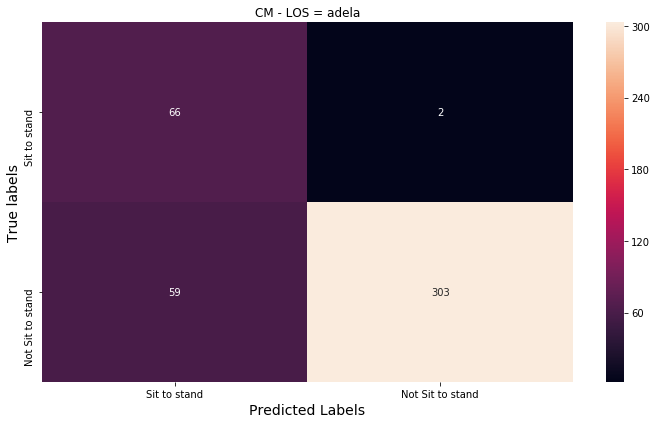

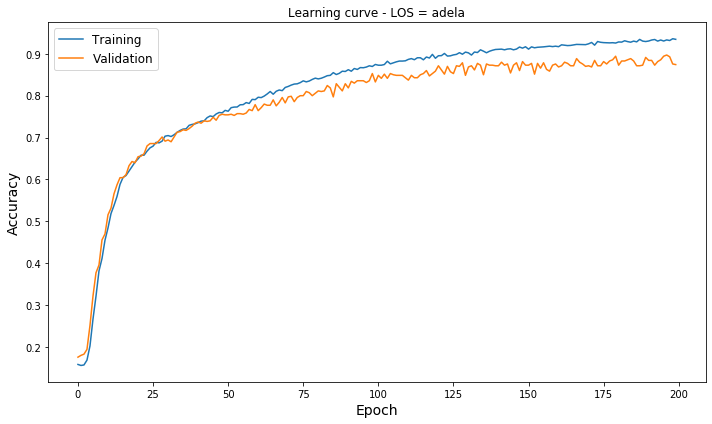

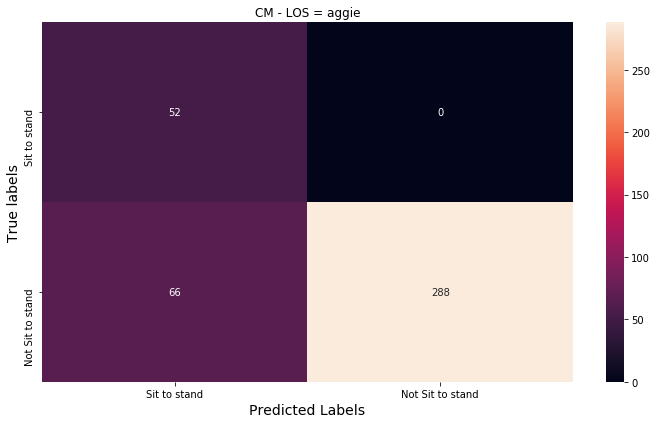

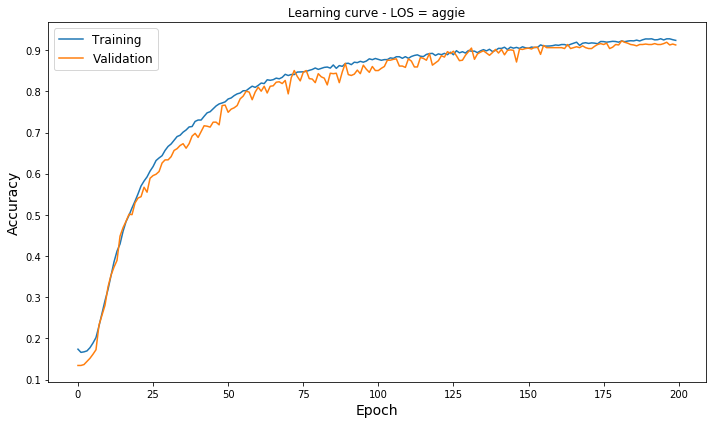

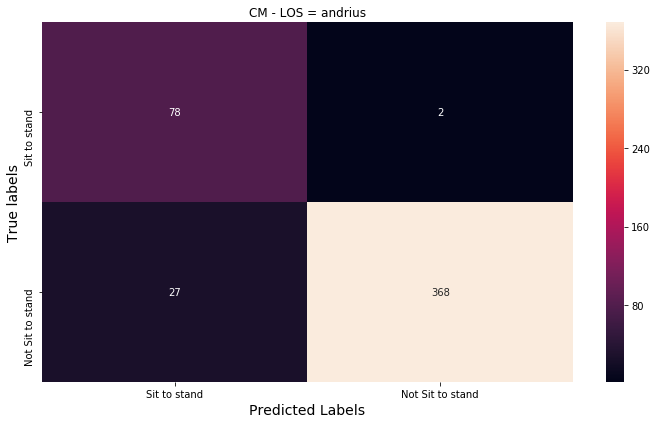

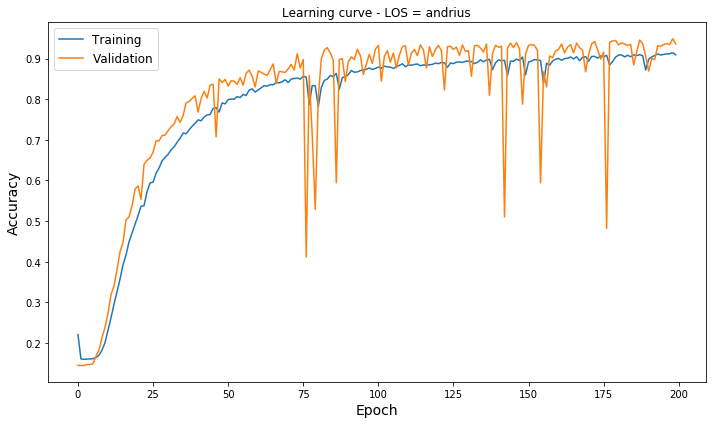

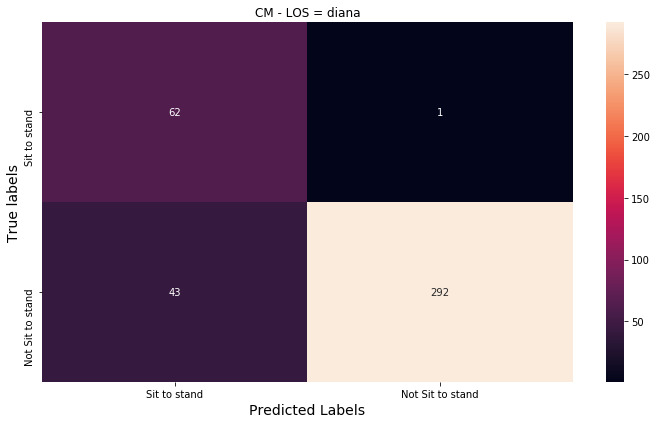

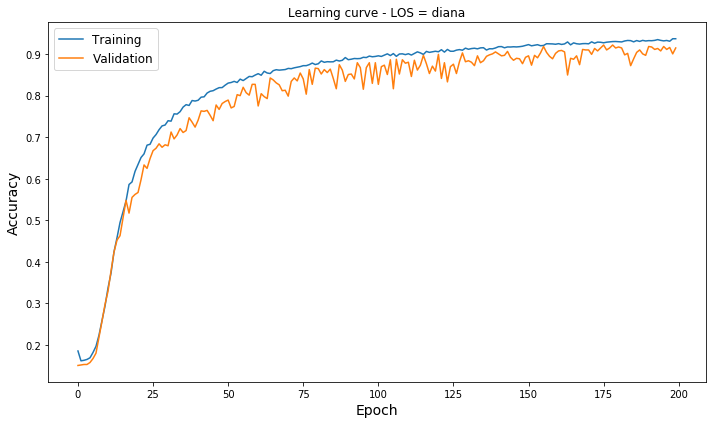

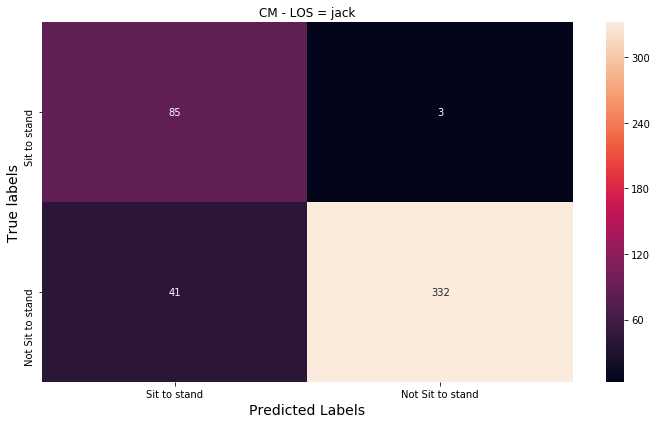

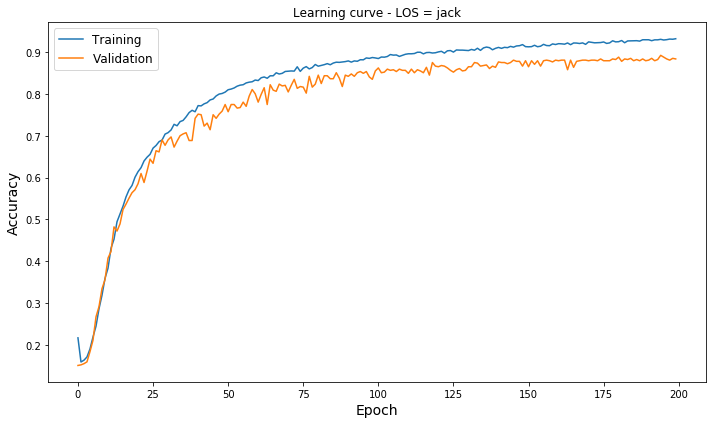

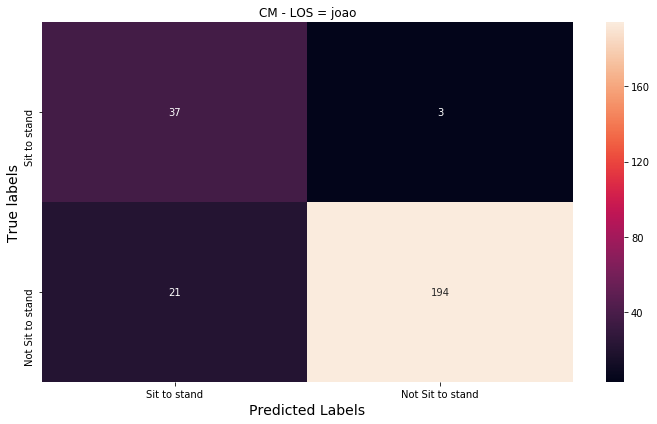

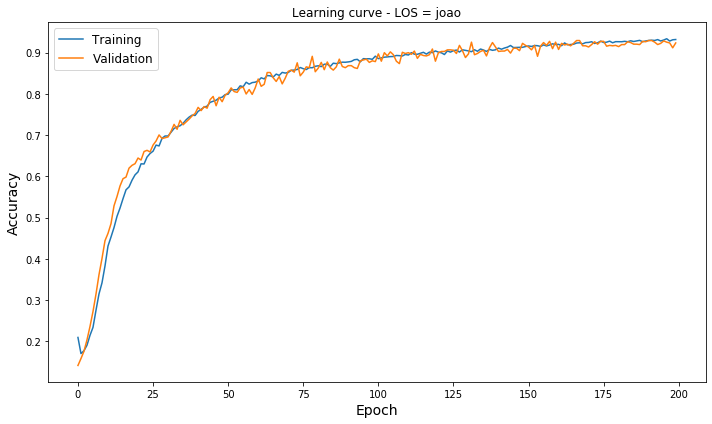

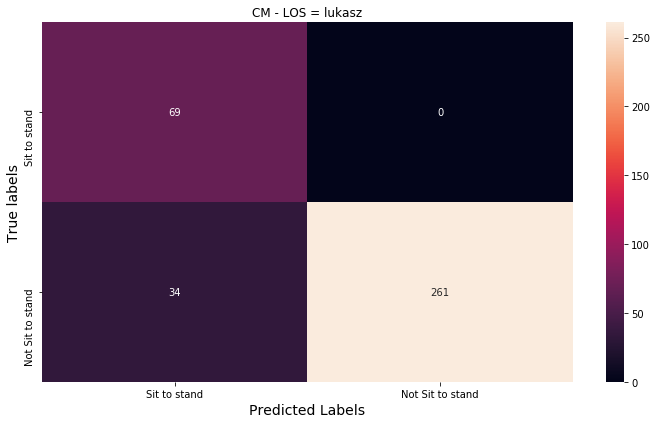

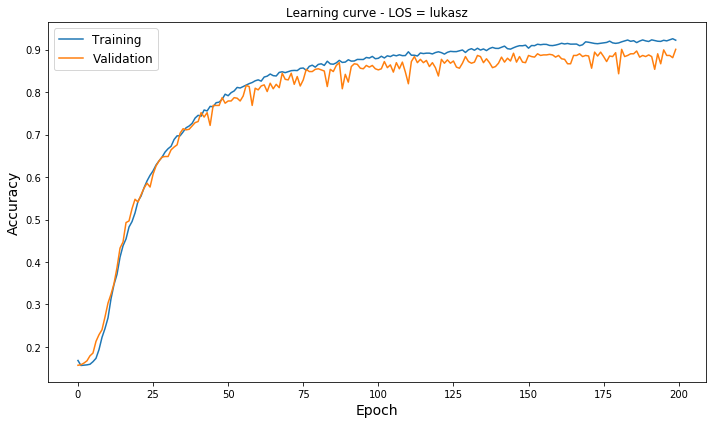

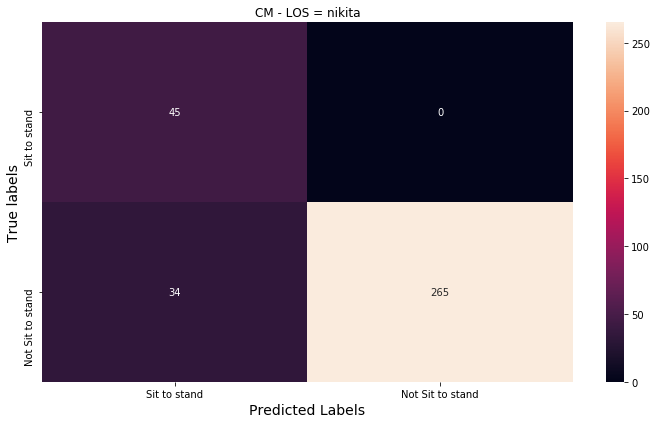

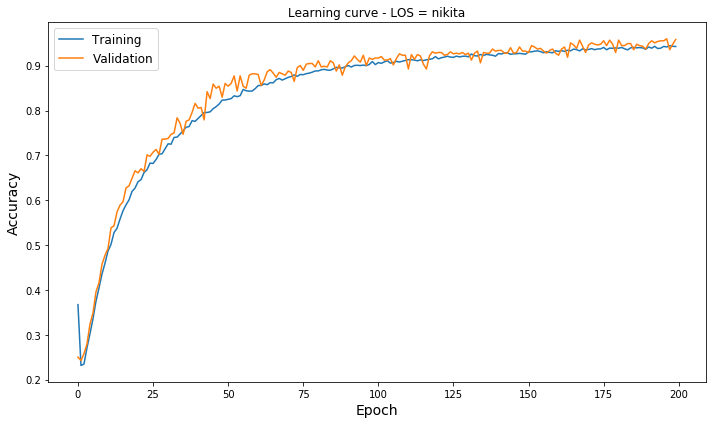

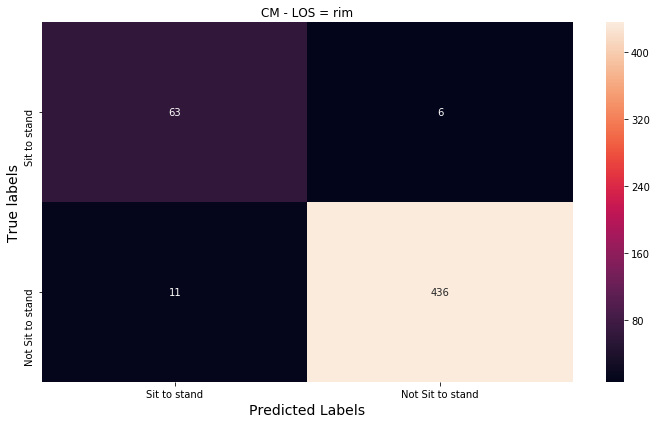

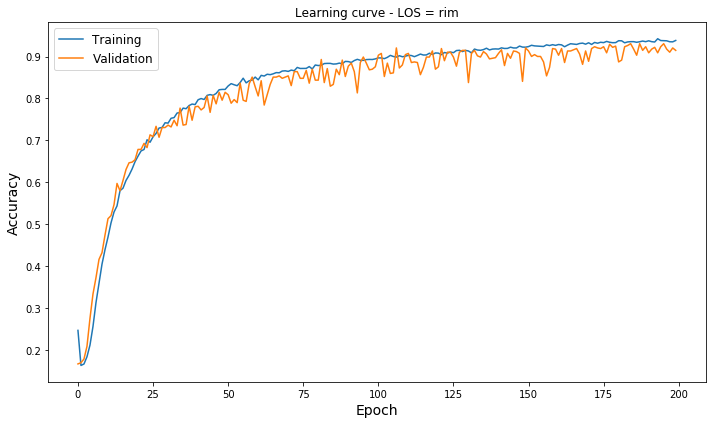

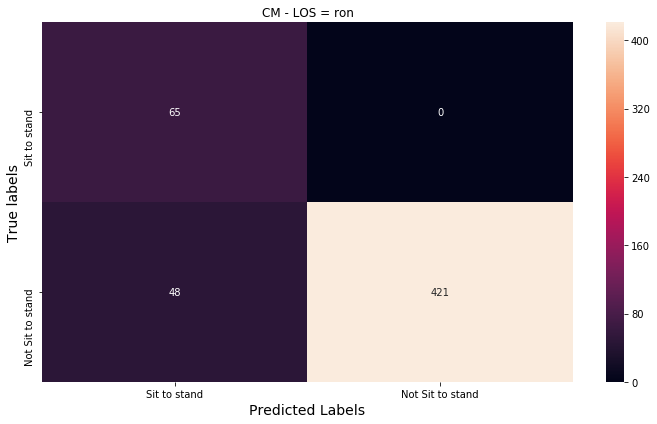

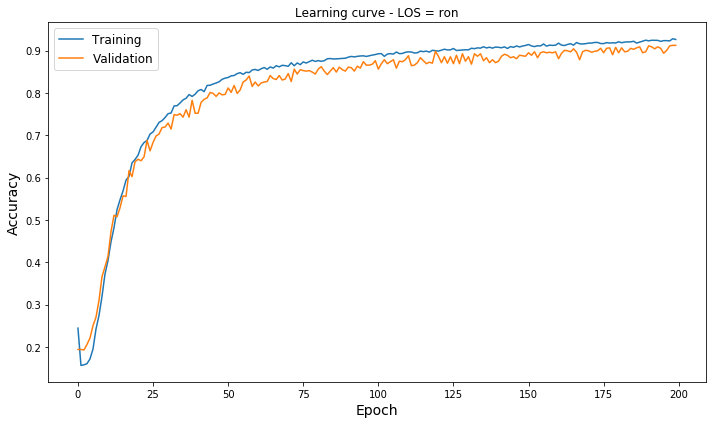

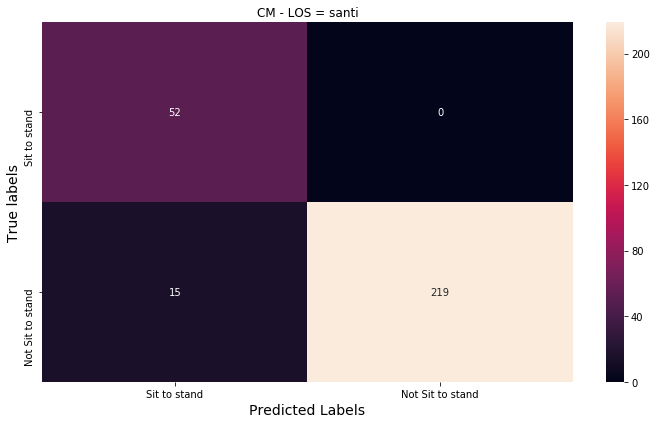

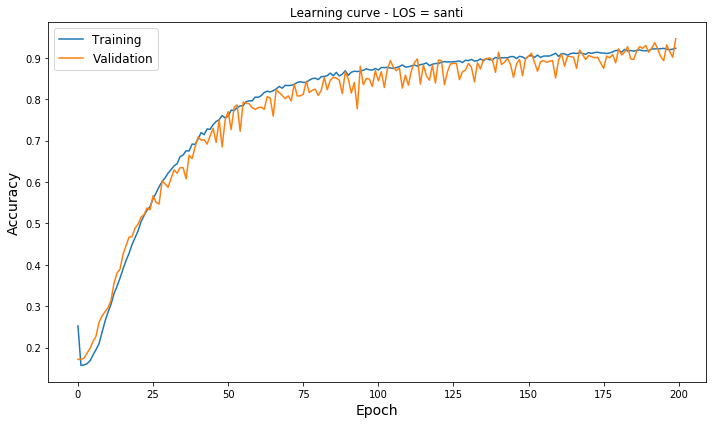

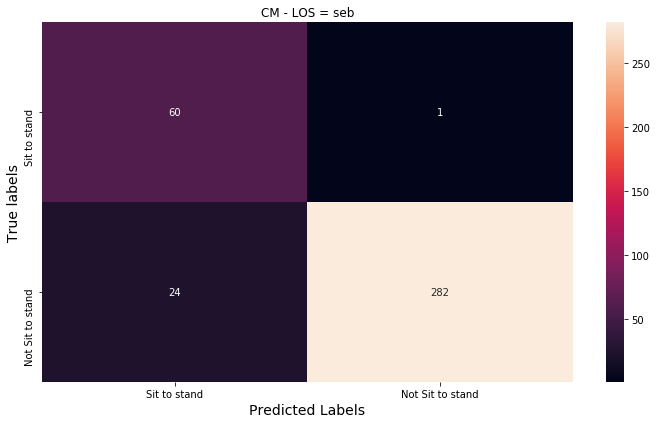

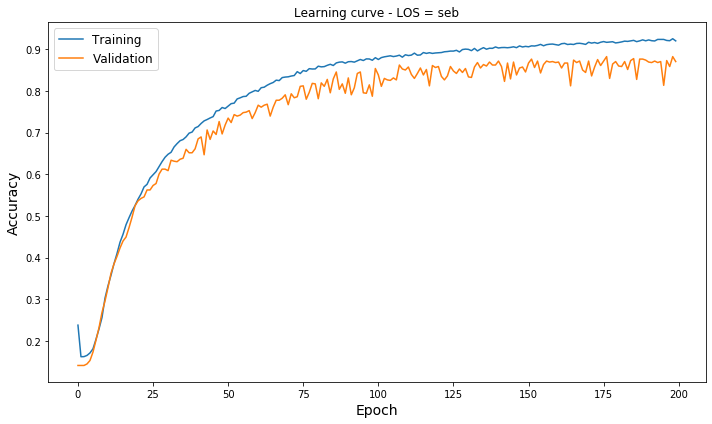

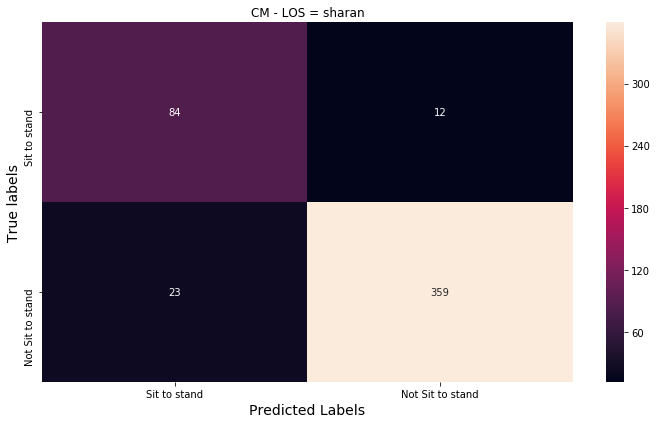

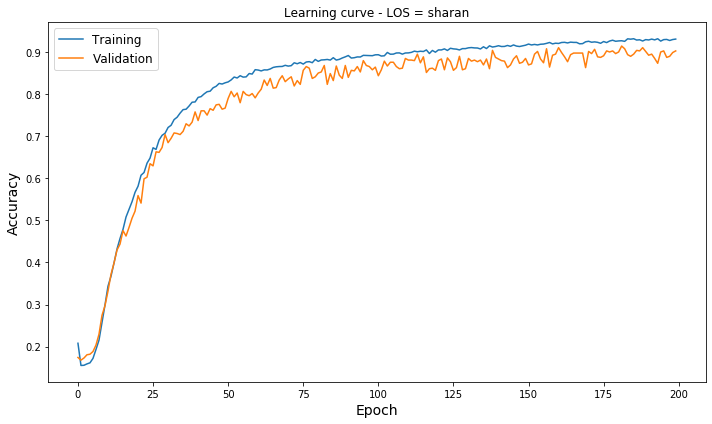

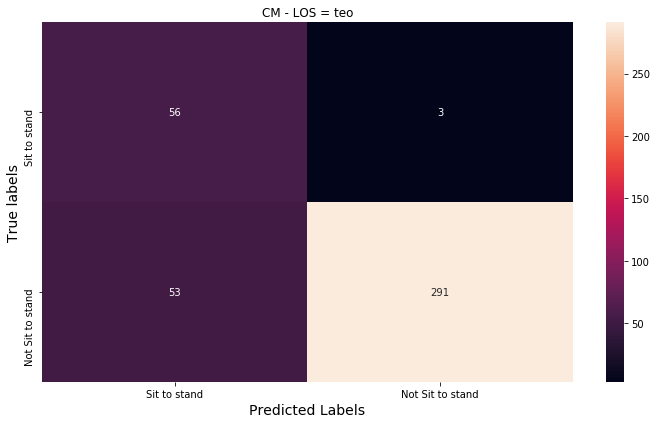

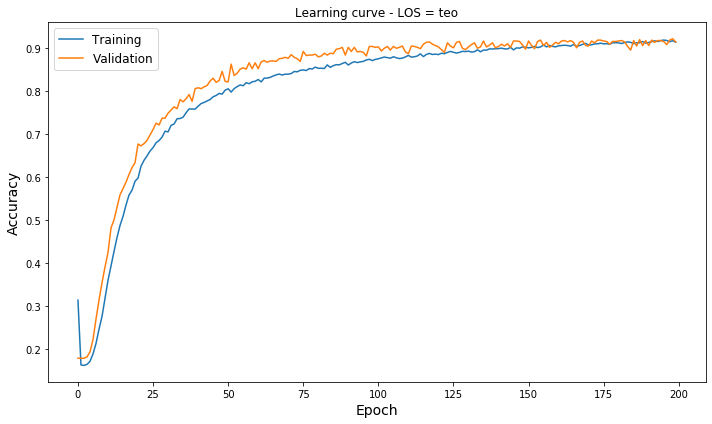

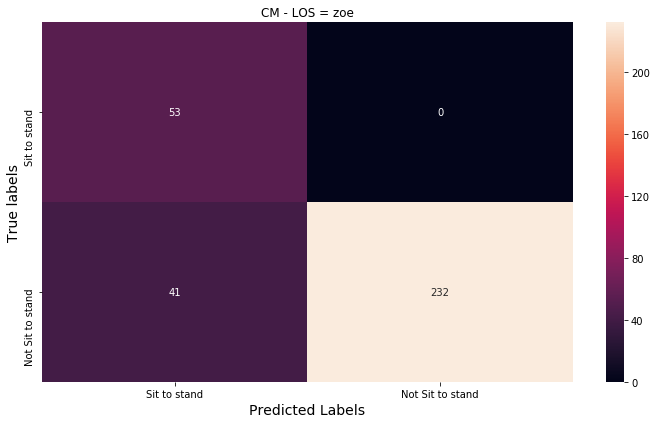

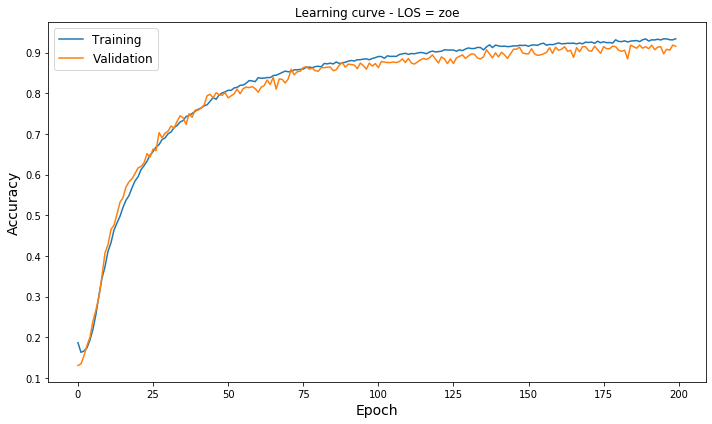

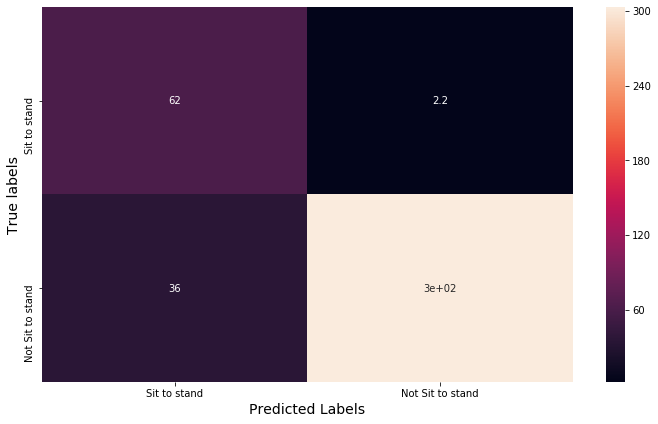

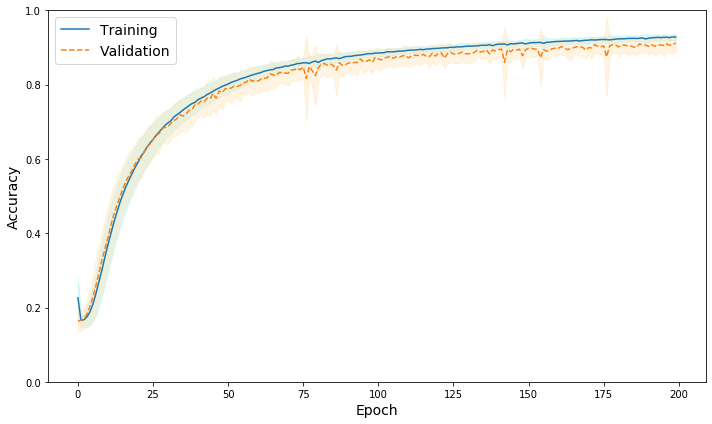

In [6]:
losoxv_stats, cm, histories, mean_cm = losoxv_one_vs_all(experiment_name, one_vs_all_activity, random_seed, correctness,
                 n_train_subjects, n_validation_subjects,
                 n_time_steps, step, n_features,
                 features, num_filters, kernel_size, activation,
                 lr, batch_size, epochs, downsample_rate, positive_class_weight)

In [7]:
experiment_stats_file = "../Plots/experiment_stats.csv"

In [9]:
def mean_std_f1(cms):
    
    f1_m = []
    
    for subject, cm in cms.items():
        precision = cms[subject][0][0] / (cms[subject][0][0] + cms[subject][1][0])
        recall = cms[subject][0][0] / (cms[subject][0][0] + cms[subject][0][1])
        f1 = (2 * precision * recall) / (precision + recall)
        
        f1_m.append(f1)
    f1_m = np.array(f1_m)
    return f1_m.mean(), f1_m.std()

In [17]:
# assumes the variables are in the namespace
def save_experiment_stats(experiment_settings):
    with open(experiment_settings.experiment_stats_file, 'a') as f: 
        f.write("\n{},".format(experiment_settings.experiment_name))
        f.write("{},".format(experiment_settings.activity_name))
        f.write("{},".format(experiment_settings.correctness))
        f.write("{},".format(experiment_settings.random_seed))
        f.write("{},".format(experiment_settings.n_train_subjects))
        f.write("{},".format(experiment_settings.n_validation_subjects))
        f.write("{},".format(experiment_settings.n_time_steps))
        f.write("{},".format(experiment_settings.step))
        f.write("{},".format(experiment_settings.n_features))
        f.write("{},".format(experiment_settings.features_name))
        f.write("{},".format(experiment_settings.num_filters))
        f.write("{},".format(experiment_settings.kernel_size))
        f.write("{},".format(experiment_settings.activation))
        f.write("{},".format(experiment_settings.lr))
        f.write("{},".format(experiment_settings.batch_size))
        f.write("{},".format(experiment_settings.epochs))
        f.write("{},".format(experiment_settings.downsample_rate))
        f.write("{},".format(experiment_settings.positive_class_weight))
        
        # accuracy, loss - train
        mean_accuracy_train = experiment_settings.losoxv_stats['train_acc'].mean()
        mean_loss_train = experiment_settings.losoxv_stats['train_loss'].mean()
        
        std_accuracy_train = experiment_settings.losoxv_stats['train_acc'].std()
        std_loss_train = experiment_settings.losoxv_stats['train_loss'].std()
        
        f.write("{},".format(mean_accuracy_train))
        f.write("{},".format(mean_loss_train))
        f.write("{},".format(std_accuracy_train))
        f.write("{},".format(std_loss_train))
        
        # accuracy, loss - validation
        mean_accuracy_valid = experiment_settings.losoxv_stats['valid_acc'].mean()
        mean_loss_valid = experiment_settings.losoxv_stats['valid_loss'].mean()
        
        std_accuracy_valid = experiment_settings.losoxv_stats['valid_acc'].std()
        std_loss_valid = experiment_settings.losoxv_stats['valid_loss'].std()
        
        f.write("{},".format(mean_accuracy_valid))
        f.write("{},".format(mean_loss_valid))
        f.write("{},".format(std_accuracy_valid))
        f.write("{},".format(std_loss_valid))
        
        # accuracy, f1, loss - test
        mean_accuracy_test = experiment_settings.losoxv_stats['test_acc'].mean()
        mean_loss_test = experiment_settings.losoxv_stats['test_loss'].mean()
        mean_f1_test, std_f1_test = mean_std_f1(experiment_settings.cm)
        
        std_accuracy_test = experiment_settings.losoxv_stats['test_acc'].std()
        std_loss_test = experiment_settings.losoxv_stats['test_loss'].std()
        
        f.write("{},".format(mean_accuracy_test))
        f.write("{},".format(mean_f1_test))
        f.write("{},".format(mean_loss_test))
        f.write("{},".format(std_accuracy_test))
        f.write("{},".format(std_f1_test))
        f.write("{}\n".format(std_loss_test))
        
        f.close()

In [18]:
save_experiment_stats()

In [22]:
experiments = pd.read_csv("../Plots/experiment_stats.csv")

In [24]:
experiments['experiment_name']

0    00_sit_to_stand_downsample_16_all_correctness_...
Name: experiment_name, dtype: object